# Imports

In [125]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, r2_score, precision_score, recall_score, f1_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.transforms import Bbox
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['axes.labelsize'] = 14
rcParams['legend.fontsize'] = 14
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Preprocesing data

## Reading data

In [126]:
n_bound = 1
data_k = pd.read_excel('kernel_shuffled.xlsx',header=None)
data_b = pd.read_excel('bound_shuffled.xlsx', sheet_name=f'Sheet{n_bound}', header=None)

In [127]:
y_data_k = data_k.get(data_k.shape[1]-1)
X_data_k = data_k.drop(columns=data_k.shape[1]-1)
y_data_b = data_b.get(data_b.shape[1]-1) 
X_data_b = data_b.drop(columns=data_b.shape[1]-1)

## Spliting data

In [128]:
# Kernel train test
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_data_k, y_data_k, test_size=0.2)
# Bound train test
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_data_b, y_data_b, test_size=0.2)

In [129]:
# Kernel + Bound train test
X_train_kb = pd.concat([X_train_k, X_train_b], axis=0)
y_train_kb = pd.concat([y_train_k, y_train_b], axis=0)
y_train_c = np.concatenate([np.zeros(y_train_k.shape), np.ones(y_train_b.shape)], axis=0).astype(int)
X_test_kb = pd.concat([X_test_k, X_test_b], axis=0)
y_test_kb = pd.concat([y_test_k, y_test_b], axis=0)
y_test_c = np.concatenate([np.zeros(y_test_k.shape), np.ones(y_test_b.shape)], axis=0).astype(int)

## Preparing data for classification

In [130]:
X_train = X_train_kb.assign(c=y_train_c, y=y_train_kb)
X_train = X_train.sample(frac=1).reset_index(drop=True)
y_train_class = X_train.get('c')
y_train_kb = X_train.get('y')
X_train_kb = X_train.drop(columns=['y','c'])

In [131]:
X_test = X_test_kb.assign(c=y_test_c, y=y_test_kb)
X_test = X_test.sample(frac=1,axis=0).reset_index(drop=True)
y_test_kb = X_test.get('y')
X_test = X_test.drop(columns='y')
y_test_class = X_test.get('c')
X_test_kb = X_test.drop(columns='c')

In [132]:
std_class = StandardScaler()
X_train_kb_std = std_class.fit_transform(X_train_kb, y_train_class)
X_test_kb_std = std_class.transform(X_test_kb)

(array([800.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 800.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

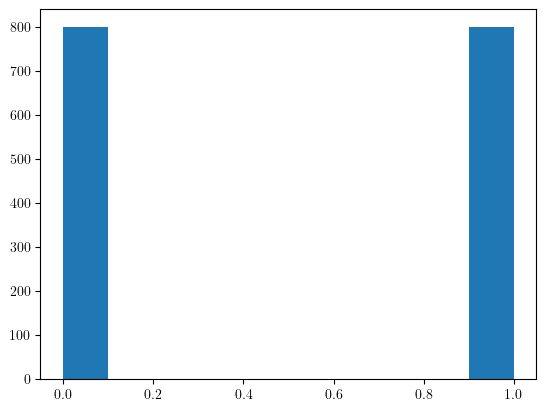

In [133]:
plt.hist(y_train_class)

## Preparing data for regression

In [134]:
std = StandardScaler()
# Kernel --> 
X_train_k_std = std.fit_transform(X_train_k, y_train_k)
# --> Kernel
X_test_k_k_std = std.transform(X_test_k)
# --> Bound
X_test_k_b_std = std.transform(X_test_b)

In [135]:
std2 = StandardScaler()
# Bound --> 
X_train_b_std = std2.fit_transform(X_train_b, y_train_b)
# --> Bound
X_test_b_b_std = std2.transform(X_test_b)
# --> Kernel
X_test_b_k_std = std2.transform(X_test_k)

In [136]:
std3 = StandardScaler()
# Kernel + Bound -->
X_train_kb_std = std3.fit_transform(X_train_kb, y_train_kb)
# --> Kernel
X_test_kb_k_std = std3.transform(X_test_k)
# --> Bound
X_test_kb_b_std = std3.transform(X_test_b)

In [137]:
y_test_b

915    0.000954
844    0.001076
176    0.001122
719    0.000952
251    0.001122
         ...   
607    0.001148
673    0.001110
292    0.000943
435    0.000889
100    0.001103
Name: 6, Length: 200, dtype: float64

# ML Classification models

Logistic Regression Report
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       200
           1       0.95      0.98      0.97       200

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

0.9680733899026308
0.9675
0.9674900438259216
SVM Report
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       200
           1       0.94      0.89      0.92       200

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

0.91876676947767
0.9175
0.9174375621563808

 Decision Tree 
 	 mean precision 	 mean recall 	 	 mean fscore 

0.0 	 0.9177 	 	 0.914 	 	 0.9158 

1.0 	 0.9144 	 	 0.918 	 	 0.9162 

	 std precision 	 	 std recall 	 	 std fscore 

0.0 	 0.0063 	 	 0.0049 	 	 0.0

<Figure size 640x480 with 0 Axes>

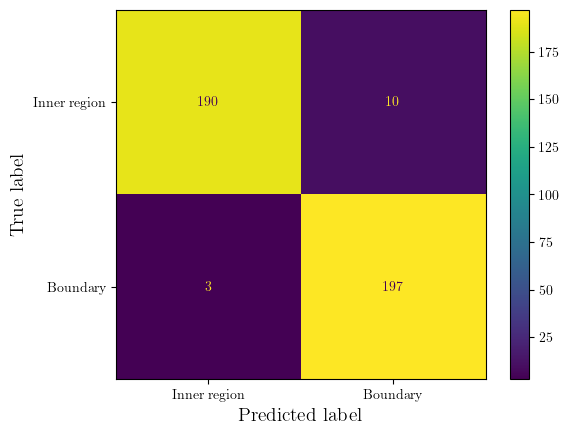

<Figure size 640x480 with 0 Axes>

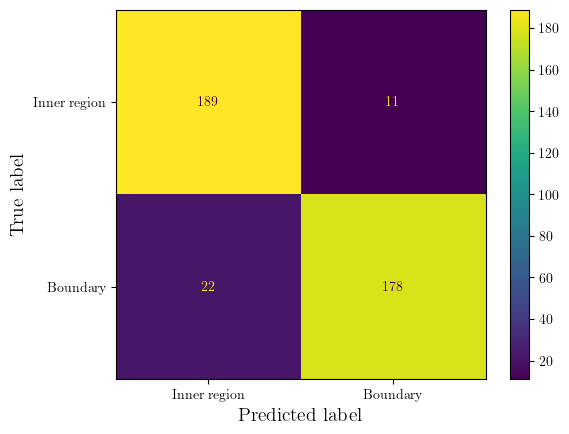

<Figure size 640x480 with 0 Axes>

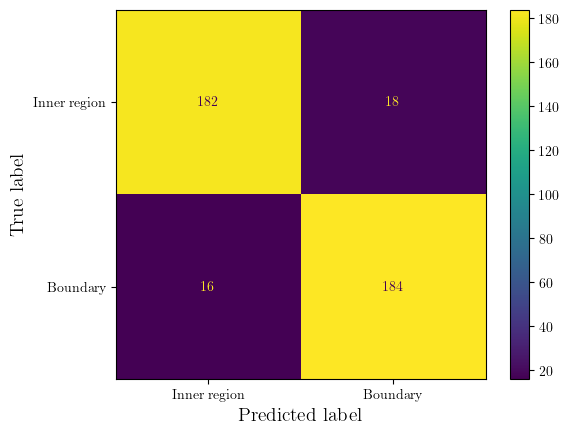

<Figure size 640x480 with 0 Axes>

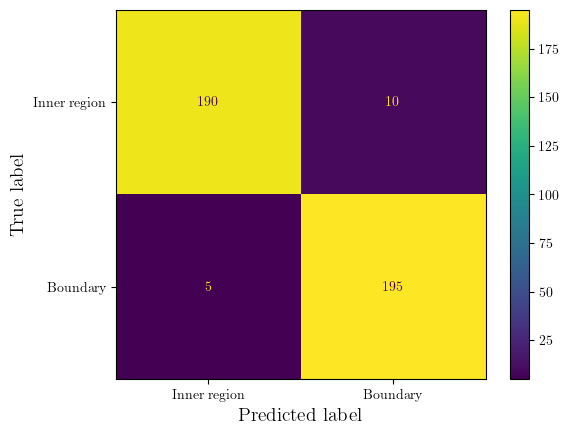

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

#LR
lr = LogisticRegression()
lr.fit(X_train_kb_std, y_train_class)
y_predict_lr = lr.predict(X_test_kb_std)
print('Logistic Regression Report\n', classification_report(y_test_class, y_predict_lr))
print(precision_score(y_test_class, y_predict_lr, average='weighted'))
print(recall_score(y_test_class, y_predict_lr, average='weighted'))
print(f1_score(y_test_class, y_predict_lr, average='weighted'))

#SVC
svc = SVC()
svc.fit(X_train_kb_std, y_train_class)
y_predict_svc = svc.predict(X_test_kb_std)
print('SVM Report\n', classification_report(y_test_class, y_predict_svc))
print(precision_score(y_test_class, y_predict_svc, average='weighted'))
print(recall_score(y_test_class, y_predict_svc, average='weighted'))
print(f1_score(y_test_class, y_predict_svc, average='weighted'))

#DT
precision_dt = []
recall_dt = []
fscore_dt = []
support_dt = []
precision_score_dt = []
recall_score_dt = []
f1_score_dt = []
for r in range(5):
    dt = DecisionTreeClassifier()
    dt.fit(X_train_kb_std, y_train_class)
    y_predict_dt = dt.predict(X_test_kb_std)
    precision,recall,fscore,support=score(y_test_class, y_predict_dt, average=None)
    precision_dt.append(precision)
    recall_dt.append(recall)
    fscore_dt.append(fscore)
    support_dt.append(support)

    p_s = precision_score(y_test_class, y_predict_dt, average='weighted')
    r_s = recall_score(y_test_class, y_predict_dt, average='weighted')
    f_s = f1_score(y_test_class, y_predict_dt, average='weighted')

    precision_score_dt.append(p_s)
    recall_score_dt.append(r_s)
    f1_score_dt.append(f_s)

precision_dt = np.array(precision_dt)
mean_precision_dt = np.mean(precision_dt, axis=0)
std_precision_dt = np.std(precision_dt, axis=0)

recall_dt = np.array(recall_dt)
mean_recall_dt = np.mean(recall_dt, axis=0)
std_recall_dt = np.std(recall_dt, axis=0)

fscore_dt = np.array(fscore_dt)
mean_fscore_dt = np.mean(fscore_dt, axis=0)
std_fscore_dt = np.std(fscore_dt, axis=0)

support_dt = np.array(support_dt)
mean_support_dt = np.mean(support_dt, axis=0)
std_support_dt = np.std(support_dt, axis=0)

print('\n','Decision Tree', '\n', '\t', 'mean precision', '\t', 'mean recall', '\t \t', 'mean fscore','\n')
print('0.0', '\t', round(mean_precision_dt[0], 4), '\t \t', round(mean_recall_dt[0], 4), '\t \t', round(mean_fscore_dt[0], 4), '\n')
print('1.0', '\t', round(mean_precision_dt[1], 4), '\t \t', round(mean_recall_dt[1], 4), '\t \t', round(mean_fscore_dt[1], 4), '\n')
print('\t', 'std precision', '\t \t', 'std recall', '\t \t', 'std fscore','\n')
print('0.0','\t', round(std_precision_dt[0], 4), '\t \t', round(std_recall_dt[0], 4), '\t \t', round(std_fscore_dt[0], 4), '\n')
print('1.0','\t', round(std_precision_dt[1], 4), '\t \t', round(std_recall_dt[1], 4), '\t \t', round(std_fscore_dt[1], 4), '\n')

print(np.mean(precision_score_dt))
print(np.mean(recall_score_dt))
print(np.mean(f1_score_dt))
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

#RF
precision_rf = []
recall_rf = []
fscore_rf = []
support_rf = []
precision_score_rf = []
recall_score_rf = []
f1_score_rf = []
for r in range(5):
    rf = RandomForestClassifier()
    rf.fit(X_train_kb_std, y_train_class)
    y_predict_rf = rf.predict(X_test_kb_std)
    precision,recall,fscore,support=score(y_test_class, y_predict_dt, average=None)
    precision_rf.append(precision)
    recall_rf.append(recall)
    fscore_rf.append(fscore)
    support_rf.append(support)

    p_s = precision_score(y_test_class, y_predict_rf, average='weighted')
    r_s = recall_score(y_test_class, y_predict_rf, average='weighted')
    f_s = f1_score(y_test_class, y_predict_rf, average='weighted')

    precision_score_rf.append(p_s)
    recall_score_rf.append(r_s)
    f1_score_rf.append(f_s)

precision_rf = np.array(precision_rf)
mean_precision_rf = np.mean(precision_rf, axis=0)
std_precision_rf = np.std(precision_rf, axis=0)

recall_rf = np.array(recall_rf)
mean_recall_rf = np.mean(recall_rf, axis=0)
std_recall_rf= np.std(recall_rf, axis=0)

fscore_rf = np.array(fscore_rf)
mean_fscore_rf = np.mean(fscore_rf, axis=0)
std_fscore_rf = np.std(fscore_rf, axis=0)


support_rf = np.array(support_rf)
mean_support_rf = np.mean(support_rf, axis=0)
std_support_rf = np.std(support_rf, axis=0)

print('\n','Random Forest', '\n', '\t', 'mean precision', '\t', 'mean recall', '\t \t', 'mean fscore','\n')
print('0.0', '\t', round(mean_precision_rf[0], 4), '\t \t', round(mean_recall_rf[0], 4), '\t \t', round(mean_fscore_rf[0], 4), '\n')
print('1.0', '\t', round(mean_precision_rf[1], 4), '\t \t', round(mean_recall_rf[1], 4), '\t \t', round(mean_fscore_rf[1], 4), '\n')
print('\t', 'std precision', '\t \t', 'std recall', '\t \t', 'std fscore','\n')
print('0.0','\t', round(std_precision_rf[0], 4), '\t \t \t', round(std_recall_rf[0], 4), '\t \t \t', round(std_fscore_rf[0], 4), '\n')
print('1.0','\t', round(std_precision_rf[1], 4), '\t \t \t', round(std_recall_rf[1], 4), '\t \t \t', round(std_fscore_rf[1], 4), '\n')

print(np.mean(precision_score_rf))
print(np.mean(recall_score_rf))
print(np.mean(f1_score_rf))

fig1 = plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_predict_lr,display_labels=["Inner region", "Boundary"])
plt.savefig('./figures/confusion_matrix_lr.eps')
plt.show()

fig2 = plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_predict_svc,display_labels=["Inner region", "Boundary"])
plt.savefig('./figures/confusion_matrix_svc.eps')
plt.show()

fig3 = plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_predict_dt,display_labels=["Inner region", "Boundary"])
plt.savefig('./figures/confusion_matrix_dt.eps')
plt.show()

fig4 = plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_predict_rf,display_labels=["Inner region", "Boundary"])
plt.savefig('./figures/confusion_matrix_rf.eps')
plt.show()

# Regression problem

## Testing the Kernel

### Kernel --> Kernel

In [139]:
#Kernel data
#Train data', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
#data_k_train = pd.read_excel('train_kernel_bound_forKernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#### Regression models

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

mlp = MLPRegressor(learning_rate='adaptive')
mlp.fit(X_train_k_std, y_train_k)
y_predict_mlp_k = mlp.predict(X_test_k_k_std)

#param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#          'activation': ['relu','tanh','logistic'],
#          'alpha': [0.0001, 0.05, 0.1],
#          'learning_rate': ['constant','adaptive'],
#          'solver': ['adam','sgd']}

#gsc = GridSearchCV(mlp,param_grid,cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

#grid_result = gsc.fit(X_train_k_std, y_train_k)

#print(grid_result.best_params_)

#y_predict_mlp_k = gsc.predict(X_test_k_k_std)


lr = LinearRegression()
lr.fit(X_train_k_std, y_train_k)
y_predict_lr_k = lr.predict(X_test_k_k_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_k_std, y_train_k)
y_predict_svr_k = svr.predict(X_test_k_k_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
rmse_dt = []
r2_dt = []
mape_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_k_std, y_train_k)
    y_predict_dt_k = dt.predict(X_test_k_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_dt_k)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_dt_k))
    r2 = r2_score(y_test_k, y_predict_dt_k)
    mape = mean_absolute_percentage_error(y_test_k, y_predict_dt_k)
    mae_dt.append(mae)
    rmse_dt.append(rmse)
    r2_dt.append(r2)
    mape_dt.append(mape)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

mae_rf = []
rmse_rf = []
r2_rf = []
mape_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_k_std, y_train_k)
    y_predict_rf_k = rf.predict(X_test_k_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_rf_k)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_rf_k))
    r2 = r2_score(y_test_k, y_predict_rf_k)
    mape = mean_absolute_percentage_error(y_test_k, y_predict_rf_k)
    mae_rf.append(mae)
    rmse_rf.append(rmse)
    r2_rf.append(r2)
    mape_rf.append(mape)
    # plt.plot(y_test_k)
    # plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_lr_k))
rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_mlp_k))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_svr_k))
rmse_dt = np.mean(rmse_dt)
rmse_rf = np.mean(rmse_rf)
mae_lr = metrics.mean_absolute_error(y_test_k, y_predict_lr_k)
mae_mlp = metrics.mean_absolute_error(y_test_k, y_predict_mlp_k)
mae_svr = metrics.mean_absolute_error(y_test_k, y_predict_svr_k)
mae_dt = np.mean(mae_dt)
mae_rf = np.mean(mae_rf)
r2_lr = r2_score(y_test_k, y_predict_lr_k)
r2_mlp = r2_score(y_test_k, y_predict_mlp_k)
r2_svr = r2_score(y_test_k, y_predict_svr_k)
r2_dt = np.mean(r2_dt)
r2_rf = np.mean(r2_rf)
mape_lr = mean_absolute_percentage_error(y_test_k, y_predict_lr_k)
mape_mlp = mean_absolute_percentage_error(y_test_k, y_predict_mlp_k)
mape_svr = mean_absolute_percentage_error(y_test_k, y_predict_svr_k)
mape_dt = np.mean(mape_dt)
mape_rf = np.mean(mape_rf)

print('Root Mean Squared Error:''\n', 'LR: ''\t', rmse_lr, '\n', 'MLP: ''\t', rmse_mlp, '\n', 'SVR: ''\t', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
print('Mean Absolute Error:''\n', 'LR: ''\t', mae_lr, '\n', 'MLP: ''\t', mae_mlp, '\n', 'SVR: ''\t', mae_svr, '\n', 'DT: ''\t', mae_dt, '\n', 'RF: ''\t', mae_rf, '\n', )
print('R2 Score:''\n', 'LR: ''\t', r2_lr, '\n', 'MLP: ''\t', r2_mlp, '\n', 'SVR: ''\t', r2_svr, '\n', 'DT: ''\t', r2_dt, '\n', 'RF: ''\t', r2_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_lr, '\n', 'MLP: ''\t', mape_mlp, '\n', 'SVR: ''\t', mape_svr, '\n', 'DT: ''\t', mape_dt, '\n', 'RF: ''\t', mape_rf, '\n', )


Root Mean Squared Error:
 LR: 	 0.0001480541692007176 
 MLP: 	 0.03259435214334345 
 SVR: 	 0.00021383149709668174 
 DT: 	 0.00018753365310178712 
 RF: 	 0.00012294041769366913 

Mean Absolute Error:
 LR: 	 0.00011443009387339318 
 MLP: 	 0.026200929747923093 
 SVR: 	 0.00017819838077181766 
 DT: 	 0.00014314424263011334 
 RF: 	 9.693500441769407e-05 

R2 Score:
 LR: 	 0.5136682014566126 
 MLP: 	 -23569.895905446756 
 SVR: 	 -0.014459553862927965 
 DT: 	 0.2196491999522518 
 RF: 	 0.6646140193334487 

MAPE Score:
 LR: 	 0.0725760605814625 
 MLP: 	 16.349713211472626 
 SVR: 	 0.11369098226111518 
 DT: 	 0.09048611846572396 
 RF: 	 0.061942180225459456 



#### ML vs True comparison

In [141]:
test_df_k = X_test_k.copy()
test_df_k = test_df_k.rename(columns={0:'E_s', 1:'f_y', 2:'f_ct', 3:'A_s', 4:'A_c',5:'M'})
test_df_k.insert(len(test_df_k.columns), 'true', y_test_k)
test_df_k.insert(len(test_df_k.columns), 'lr_predict', y_predict_lr_k)
test_df_k.insert(len(test_df_k.columns), 'mlp_predict', y_predict_mlp_k)
test_df_k.insert(len(test_df_k.columns), 'svr_predict', y_predict_svr_k)
test_df_k.insert(len(test_df_k.columns), 'dt_predict', y_predict_dt_k)
test_df_k.insert(len(test_df_k.columns), 'rf_predict', y_predict_rf_k)
test_df_k

E_s         f_y      f_ct          A_s            A_c  \
293  199899.500585  422.257709  3.659380   885.812039   76280.972413   
740  195026.431606  403.864214  3.194939   343.034746   64833.520430   
762  196628.289479  488.895561  3.067463   354.128303   43794.549268   
421  203422.084834  402.657954  3.103846   550.795564  107490.421616   
16   197343.795479  487.393545  3.103670  1153.496118  297671.099341   
..             ...         ...       ...          ...            ...   
386  201266.061131  457.239501  3.799658   474.356146   46457.773799   
331  197991.955704  411.778983  2.826724   180.261231   33593.301861   
973  195555.424826  468.502932  3.984478    46.037548    4113.335264   
138  195746.901946  473.402315  3.107863   219.580607   24675.207713   
543  202427.210981  472.113082  3.358277  1081.346913  220111.485783   

               M      true  lr_predict  mlp_predict  svr_predict  dt_predict  \
293  2405.240422  0.001793    0.001823    -0.002677     0.001672    0.001858   
740  1496.775828  0.001196    0.001449    -0.012992     0.001672    0.001250   
762  1520.785713  0.002042    0.001945    -0.024828     0.001672    0.002068   
421  1896.631337  0.001211    0.001342    -0.060286     0.001672    0.001383   
16   2744.705632  0.001668    0.001448    -0.013810     0.001672    0.001797   
..           ...       ...         ...          ...          ...         ...   
386  1760.110650  0.001854    0.001754     0.006832     0.001672    0.001862   
331  1085.022817  0.001251    0.001497    -0.003667     0.001672    0.001512   
973   548.332261  0.001760    0.001681    -0.027922     0.001672    0.001367   
138  1197.525294  0.001962    0.001852     0.014626     0.001672    0.001989   
543  2657.481360  0.001654    0.001580    -0.015620     0.001672    0.001653   

     rf_predict  
293    0.001792  
740    0.001433  
762    0.001939  
421    0.001359  
16     0.001720  
..          ...  
386    0.001727  
331    0.001446  
973    0.001662  
138    0.001903  
543    0.001619  

[200 rows x 12 columns]

In [142]:
train_df_k = X_train_k.copy()
train_df_k = train_df_k.rename(columns={0:'E_s',1:'f_y',2:'f_ct',3:'A_s',4:'A_c',5:'M'})
train_df_k.insert(len(train_df_k.columns), 'true', y_train_k)
train_df_k.insert(len(train_df_k.columns), 'lr_predict', lr.predict(X_train_k_std))
train_df_k.insert(len(train_df_k.columns), 'mlp_predict', mlp.predict(X_train_k_std))
train_df_k.insert(len(train_df_k.columns), 'svr_predict', svr.predict(X_train_k_std))
train_df_k.insert(len(train_df_k.columns), 'dt_predict', dt.predict(X_train_k_std))
train_df_k.insert(len(train_df_k.columns), 'rf_predict', rf.predict(X_train_k_std))
train_df_k

E_s         f_y      f_ct         A_s            A_c  \
850  199569.355158  495.661144  2.843571  575.252164  115050.083606   
235  201652.814823  406.331499  3.438558  189.975208   25144.871909   
791  196227.430053  485.007376  3.218034   71.689032    4625.561255   
819  199161.308240  451.834431  2.876306  234.246038   42310.877987   
821  197331.282081  451.162694  2.935760  182.677132   25275.486225   
..             ...         ...       ...         ...            ...   
98   200609.601890  428.958535  3.200499  578.897420   57412.485959   
537  201569.554906  421.866887  2.621188  727.293658  166483.363202   
789  202910.908469  448.142746  3.882353  401.041867   31355.628463   
625  204725.450116  491.080058  2.726647  140.578187   33939.055555   
777  201854.684395  416.604828  3.805612  737.690422  119575.131741   

               M      true  lr_predict  mlp_predict  svr_predict  dt_predict  \
850  1938.281431  0.001865    0.001833     0.044362     0.001672    0.001865   
235  1113.874261  0.001334    0.001411    -0.003741     0.001672    0.001334   
791   684.248830  0.002151    0.001854    -0.009000     0.001672    0.002151   
819  1236.869361  0.001549    0.001673    -0.016225     0.001672    0.001549   
821  1092.269476  0.001714    0.001716     0.024340     0.001672    0.001714   
..           ...       ...         ...          ...          ...         ...   
98   1944.412980  0.001790    0.001731     0.017497     0.001672    0.001790   
537  2179.428395  0.001404    0.001385     0.060483     0.001672    0.001404   
789  1618.387671  0.001860    0.001691    -0.037962     0.001672    0.001860   
625   958.179056  0.001391    0.001770    -0.012522     0.001672    0.001391   
777  2194.950734  0.001347    0.001446     0.049748     0.001672    0.001347   

     rf_predict  
850    0.001838  
235    0.001382  
791    0.002062  
819    0.001578  
821    0.001702  
..          ...  
98     0.001758  
537    0.001420  
789    0.001783  
625    0.001457  
777    0.001389  

[800 rows x 12 columns]

In [143]:
df_k = pd.concat([train_df_k, test_df_k], ignore_index=True, axis=0)
df_k.to_csv('./data/kernel-with-predictions.csv', index=False)
df_k

E_s         f_y      f_ct          A_s            A_c  \
0    199569.355158  495.661144  2.843571   575.252164  115050.083606   
1    201652.814823  406.331499  3.438558   189.975208   25144.871909   
2    196227.430053  485.007376  3.218034    71.689032    4625.561255   
3    199161.308240  451.834431  2.876306   234.246038   42310.877987   
4    197331.282081  451.162694  2.935760   182.677132   25275.486225   
..             ...         ...       ...          ...            ...   
995  201266.061131  457.239501  3.799658   474.356146   46457.773799   
996  197991.955704  411.778983  2.826724   180.261231   33593.301861   
997  195555.424826  468.502932  3.984478    46.037548    4113.335264   
998  195746.901946  473.402315  3.107863   219.580607   24675.207713   
999  202427.210981  472.113082  3.358277  1081.346913  220111.485783   

               M      true  lr_predict  mlp_predict  svr_predict  dt_predict  \
0    1938.281431  0.001865    0.001833     0.044362     0.001672    0.001865   
1    1113.874261  0.001334    0.001411    -0.003741     0.001672    0.001334   
2     684.248830  0.002151    0.001854    -0.009000     0.001672    0.002151   
3    1236.869361  0.001549    0.001673    -0.016225     0.001672    0.001549   
4    1092.269476  0.001714    0.001716     0.024340     0.001672    0.001714   
..           ...       ...         ...          ...          ...         ...   
995  1760.110650  0.001854    0.001754     0.006832     0.001672    0.001862   
996  1085.022817  0.001251    0.001497    -0.003667     0.001672    0.001512   
997   548.332261  0.001760    0.001681    -0.027922     0.001672    0.001367   
998  1197.525294  0.001962    0.001852     0.014626     0.001672    0.001989   
999  2657.481360  0.001654    0.001580    -0.015620     0.001672    0.001653   

     rf_predict  
0      0.001838  
1      0.001382  
2      0.002062  
3      0.001578  
4      0.001702  
..          ...  
995    0.001727  
996    0.001446  
997    0.001662  
998    0.001903  
999    0.001619  

[1000 rows x 12 columns]

##### Eq 1

[136  53 197  58  29 187 142  19  67  71]


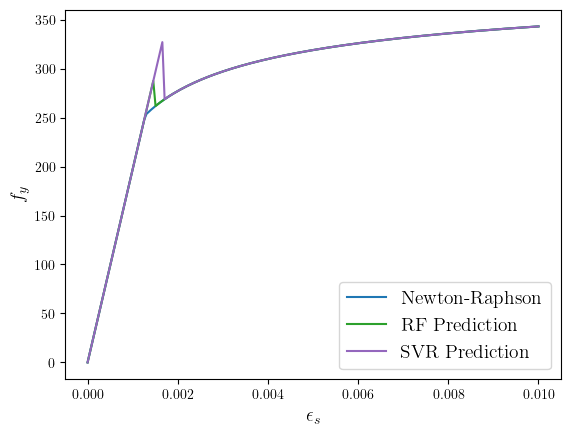

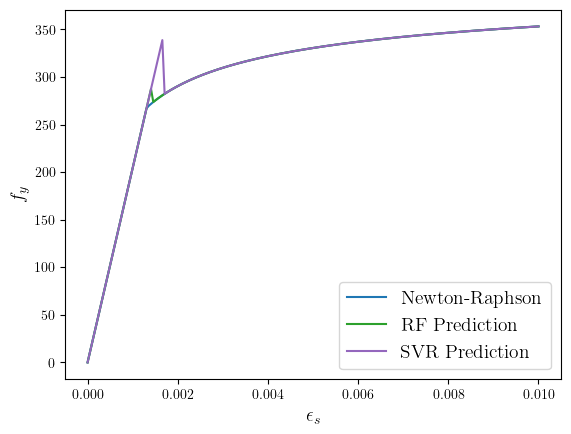

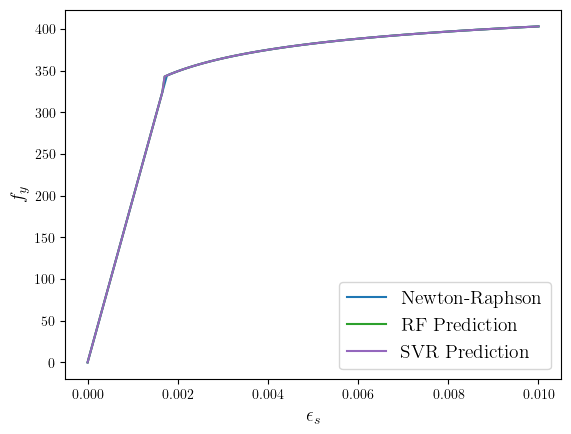

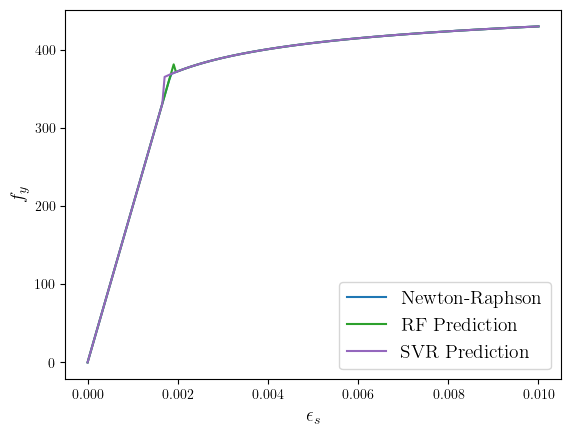

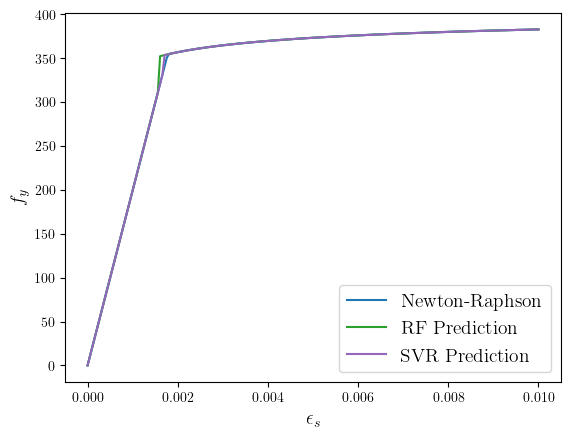

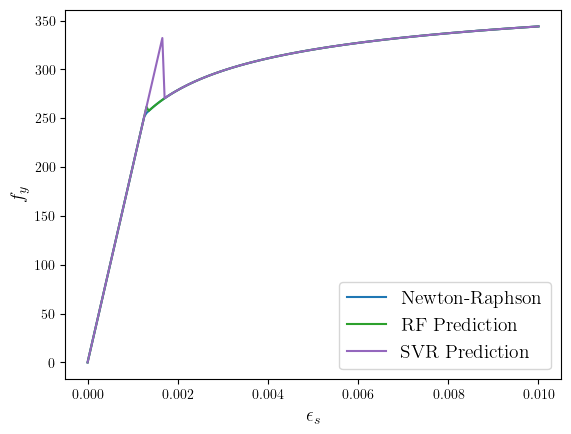

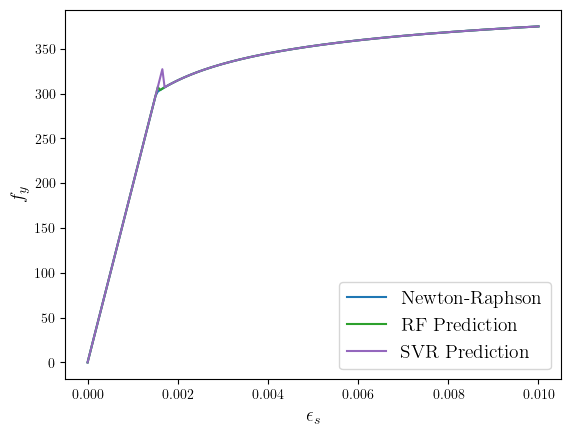

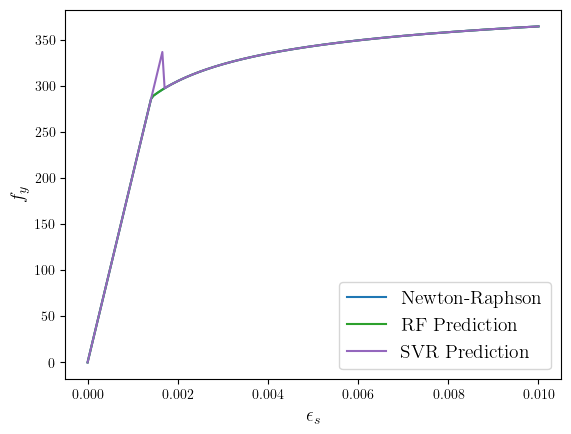

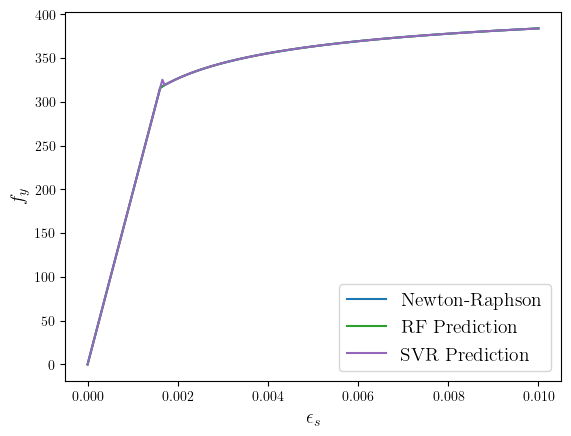

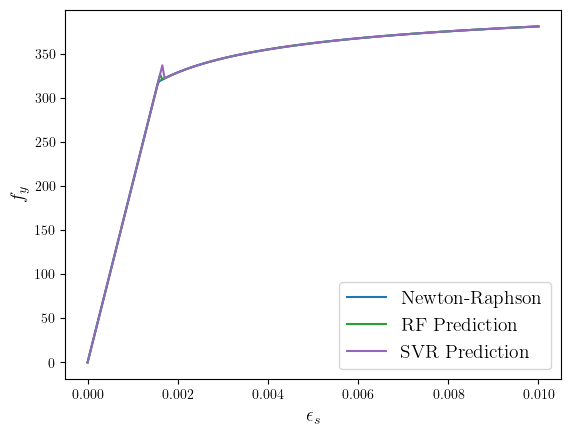

In [144]:
E_s = np.array(test_df_k.get('E_s'))
f_y = np.array(test_df_k.get('f_y'))
f_ct = np.array(test_df_k.get('f_ct'))
A_s = np.array(test_df_k.get('A_s'))
A_c = np.array(test_df_k.get('A_c'))
M = np.array(test_df_k.get('M'))
epsilon_max = np.array(test_df_k.get('true'))
epsilon_rf = np.array(test_df_k.get('rf_predict'))
epsilon_svr = np.array(test_df_k.get('svr_predict'))

epsilon_s = np.linspace(0, 0.01, 200)#np.array([i*0.0001%0.001 for i in range(1000)])

idxs = np.random.choice(np.arange(len(epsilon_max)), 10, replace=False)
print(idxs)

for idx in idxs:
    mask = epsilon_s >= epsilon_max[idx]

    sigma = np.zeros(np.shape(epsilon_max)) + E_s[idx] * epsilon_s
    sigma[mask] = f_y[idx] - ((A_c[idx] * f_ct [idx])/(A_s[idx] * (1 + np.sqrt(3.6 * M[idx] * epsilon_s[mask]))))

    mask_rf = epsilon_s >= epsilon_rf[idx]

    sigma_rf = np.zeros(np.shape(epsilon_rf)) + E_s[idx] * epsilon_s
    sigma_rf[mask_rf] = f_y[idx] - ((A_c[idx] * f_ct [idx])/(A_s[idx] * (1 + np.sqrt(3.6 * M[idx] * epsilon_s[mask_rf]))))

    mask_svr = epsilon_s >= epsilon_svr[idx]

    sigma_svr = np.zeros(np.shape(epsilon_rf)) + E_s[idx] * epsilon_s
    sigma_svr[mask_svr] = f_y[idx] - ((A_c[idx] * f_ct [idx])/(A_s[idx] * (1 + np.sqrt(3.6 * M[idx] * epsilon_s[mask_svr]))))

    plt.figure()
    plt.plot(epsilon_s, sigma, color='tab:blue', label = 'Newton-Raphson')
    #plt.axvline(x=epsilon_max[idx], color = 'tab:orange',label='epsilon_max Newton-Raphson')
    plt.plot(epsilon_s, sigma_rf, color='tab:green', label = 'RF Prediction')
    #plt.axvline(x=epsilon_rf[idx], color = 'tab:red', label='epsilon_max RF Prediction')
    plt.plot(epsilon_s, sigma_svr, color='tab:purple', label = 'SVR Prediction')
    #plt.axvline(x=epsilon_svr[idx], color = 'tab:brown', label='epsilon_max SVR Prediction')
    plt.ylabel('$f_y$')
    plt.xlabel('$\epsilon_s$')
    plt.legend()
    plt.show()


##### Monte-carlo sampling

In [145]:
from sklearn.kernel_approximation import RBFSampler

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_true = rbf_feature.fit_transform(np.reshape([df_k.get('true')], (1000, 1)))

# d_lr_pred =rbf_feature.transform(np.reshape([df_b.get('lr_predict')], (1000, 1))) 

# d_mlp_pred =rbf_feature.transform(np.reshape([df_b.get('mlp_predict')], (1000, 1))) 

# d_svr_pred =rbf_feature.transform(np.reshape([df_b.get('svr_predict')], (1000, 1))) 

# d_dt_pred =rbf_feature.transform(np.reshape([df_b.get('dt_predict')], (1000, 1))) 

# d_rf_pred =rbf_feature.transform(np.reshape([df_b.get('rf_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_lr_pred =rbf_feature.fit_transform(np.reshape([df_k.get('lr_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_mlp_pred =rbf_feature.fit_transform(np.reshape([df_k.get('mlp_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_svr_pred =rbf_feature.fit_transform(np.reshape([df_k.get('svr_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_dt_pred =rbf_feature.fit_transform(np.reshape([df_k.get('dt_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_rf_pred =rbf_feature.fit_transform(np.reshape([df_k.get('rf_predict')], (1000, 1))) 

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 18 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 23 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


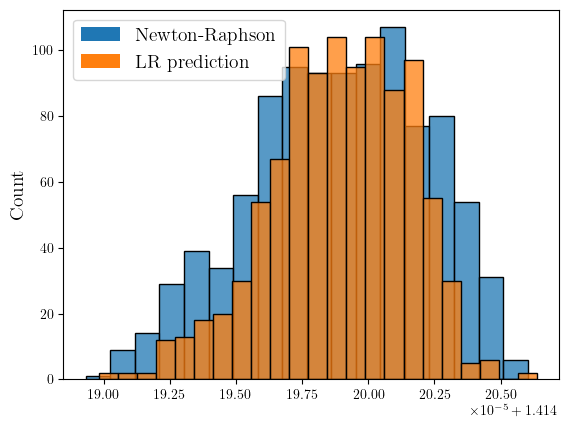

In [146]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_lr_pred).flatten(), legend=False)
plt.legend(labels = ['Newton-Raphson', '_A_','LR prediction', '_A_'])
plt.savefig('./figures/kernel-montecarlo-lr.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 18 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 45 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


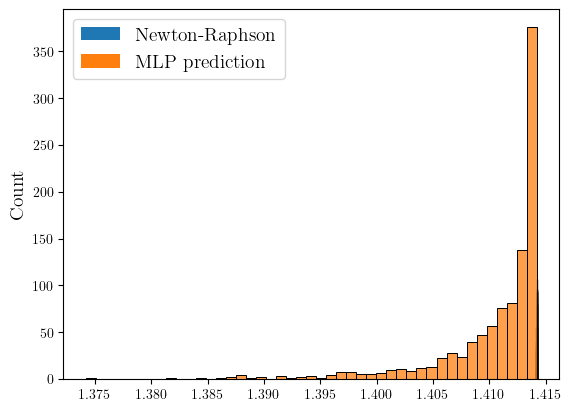

In [147]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_mlp_pred).flatten(), legend=False)
plt.legend(labels = ['Newton-Raphson', '_A_','MLP prediction', '_A_'])
plt.savefig('./figures/kernel-montecarlo-mlp.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 18 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 1 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


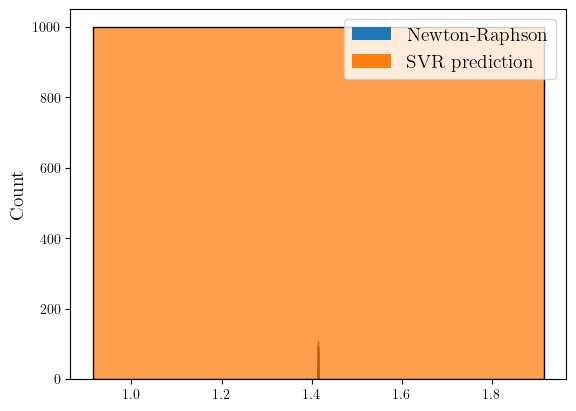

In [148]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_svr_pred).flatten(), legend=False)
plt.legend(labels = ['Newton-Raphson', '_A_','SVR prediction', '_A_'])
plt.savefig('./figures/kernel-montecarlo-svr.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 18 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


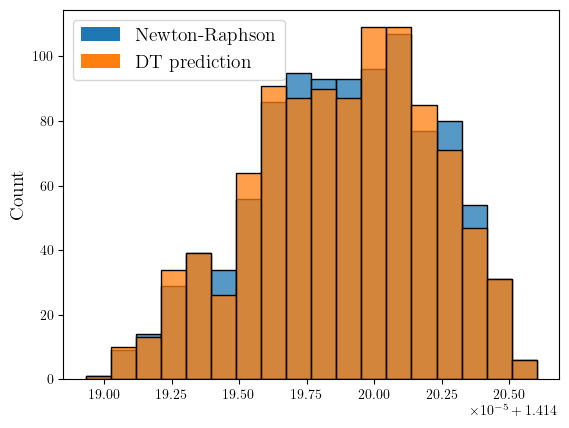

In [149]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_dt_pred).flatten(), legend=False)
plt.legend(labels = ['Newton-Raphson', '_A_','DT prediction', '_A_'])
plt.savefig('./figures/kernel-montecarlo-dt.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 18 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 19 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


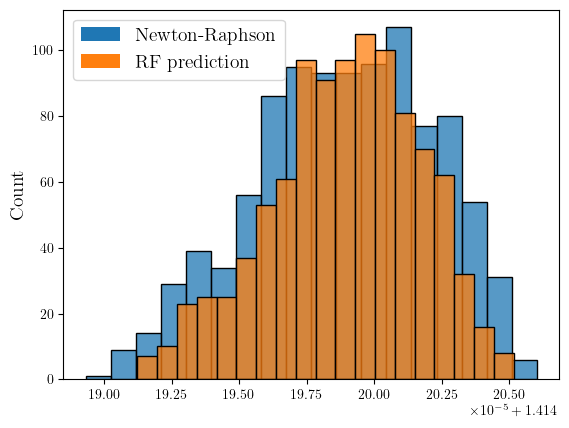

In [150]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_rf_pred).flatten(), legend=False)
plt.legend(labels = ['Newton-Raphson', '_A_','RF prediction', '_A_'])
plt.savefig('./figures/kernel-montecarlo-rf.png')

### Heat map

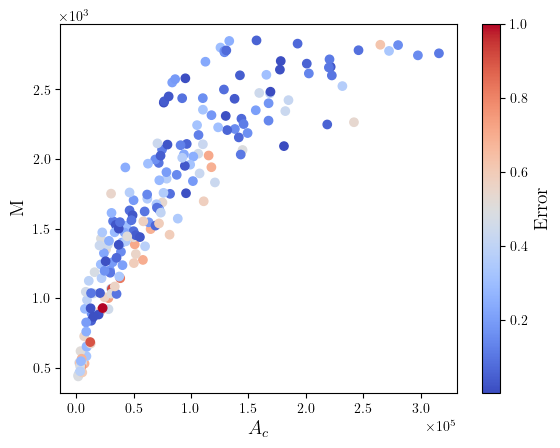

In [151]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_k)
col1 = np.abs(y_test_k - y_predict_rf_k)
col1 = col1/col1.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='coolwarm')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"Error"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/heatmap-kernel-error-predictwithclass.eps',format='eps',dpi=300)
plt.show()

### Heat map

<Figure size 640x480 with 0 Axes>

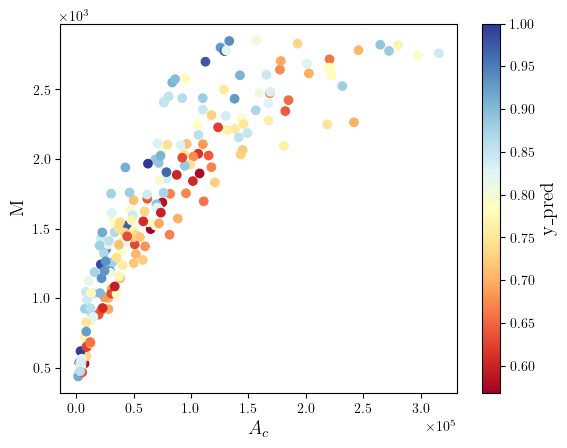

In [152]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_k)
col1 = y_test_k
col1 = col1/col1.max()
plt.show()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='RdYlBu')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"y_pred"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/heatmap-kernel-real.eps',format='eps',dpi=300)
plt.show()

In [153]:
print(X_train_k_std.shape)
print(y_train_k.shape)

(800, 6)
(800,)


In [154]:
# # TENSORFLOW
# def build_model():
#     model = keras.Sequential([
#         layers.Conv1D(16, 1, input_shape=[X_train_b_std.shape[1],1]),
#         layers.Conv1D(8, 1),
#         layers.Conv1D(4, 1),
#         #layers.Dense(32, activation='relu', input_shape=[X_train_b_std.shape[1]]),
#         #layers.Dropout(0.1),
#         #layers.Dense(16, activation='relu'),
#         #layers.Dropout(0.1),
#         layers.Flatten(),
#         layers.Dense(4, activation='relu'),
#         #layers.Dropout(0.1),
#         layers.Dense(1, activation='linear')
#     ])

#     optimizer = tf.keras.optimizers.Adam(0.001)

#     model.compile(loss='mse',
#         optimizer=optimizer,
#         metrics=['mae', 'mse'])
#     return model


# model = build_model()
# model.summary()

# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [Strain]')
#     plt.plot(hist['epoch'], hist['mae'])
#     plt.ylabel('Mean Square Error [$Strain^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
#     plt.legend()
#     plt.show()


# #early_stop = keras.callbacks.EarlyStopping(monitor='val_mae', patience=15, min_delta=1e-10)


# history = model.fit(X_train_b_std, y_train_b, epochs=1000, validation_split = 0.2, verbose=1)

# plot_history(history)

# test_predictions = model.predict(X_test_b_b_std).flatten()

# print(test_predictions.shape)
# print(y_test_b.shape)

# plt.scatter(y_test_b, test_predictions)
# plt.xlabel('True Values [Strain]')
# plt.ylabel('Predictions [Strain]')
# plt.axis('equal')
# plt.axis('square')
# plt.xlim([0,plt.xlim()[1]])
# plt.ylim([0,plt.ylim()[1]])
# _ = plt.plot([-100, 100], [-100, 100])
# plt.show()

# error = test_predictions - y_test_b
# plt.hist(error, bins = 25)
# plt.xlabel("Prediction Error [Strain]")
# _ = plt.ylabel("Count")
# plt.show()

# rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_b, test_predictions))
# mae_mlp = metrics.mean_absolute_error(y_test_b, test_predictions)
# r2_mlp = r2_score(y_test_b, test_predictions)
# mape_mlp = mean_absolute_percentage_error(y_test_b, test_predictions)

# print(f'RSME: {rmse_mlp} \n MAE: {mae_mlp} \n R2: {r2_mlp} \n MAPE: {mape_mlp} \n')

### TENSORFLOW
def build_model():
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[X_train_kb_std.shape[1]]),
        layers.Dropout(0.1),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(8, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(1, activation='linear')
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
        optimizer=optimizer,
        metrics=['mae', 'mse'])
    return model


model = build_model()
model.summary()

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Strain]')
    plt.plot(hist['epoch'], hist['mae'])
    plt.ylabel('Mean Square Error [$Strain^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.show()


#early_stop = keras.callbacks.EarlyStopping(monitor='val_mae', patience=15, min_delta=1e-10)


history = model.fit(X_train_kb_std, y_train_kb, epochs=1000, validation_split = 0.2, verbose=1)

plot_history(history)

test_predictions = model.predict(X_test_kb_std).flatten()

plt.scatter(y_test_kb[y_test_class==1], test_predictions[y_test_class==1])
plt.xlabel('True Values [Strain]')
plt.ylabel('Predictions [Strain]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

error = test_predictions[y_test_class==1] - y_test_kb[y_test_class==1]
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Strain]")
_ = plt.ylabel("Count")
plt.show()

rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], test_predictions[y_test_class==1]))
mae_mlp = metrics.mean_absolute_error(y_test_kb[y_test_class==1], test_predictions[y_test_class==1])
r2_mlp = r2_score(y_test_kb[y_test_class==1], test_predictions[y_test_class==1])
mape_mlp = mean_absolute_percentage_error(y_test_kb[y_test_class==1], test_predictions[y_test_class==1])

print(f'RMSE: {rmse_mlp} \n MAE: {mae_mlp} \n R2: {r2_mlp} \n MAPE: {mape_mlp} \n')

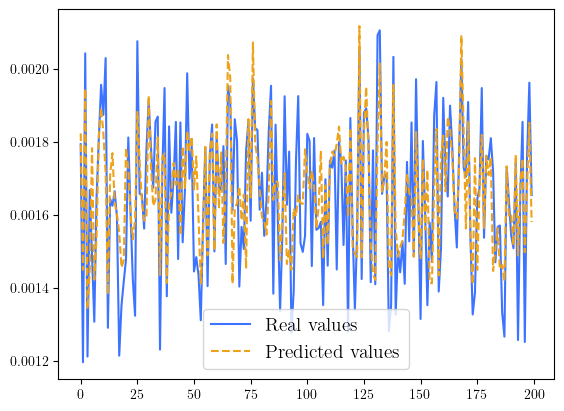

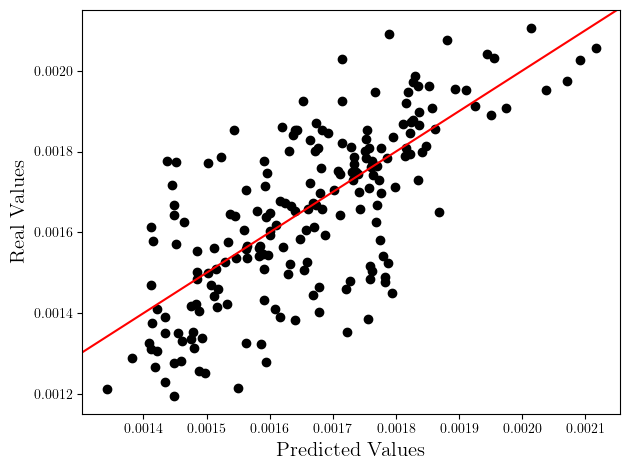

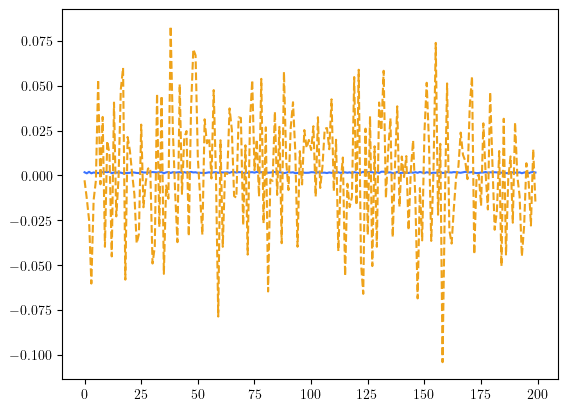

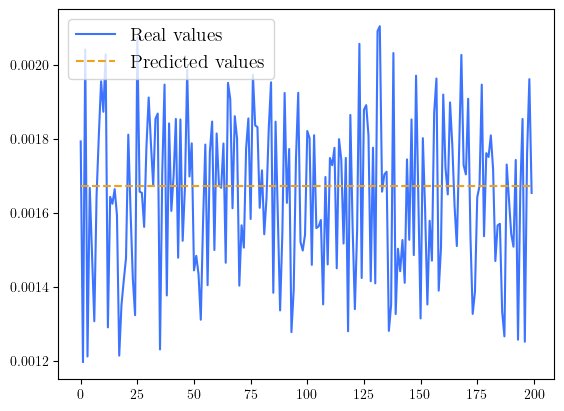

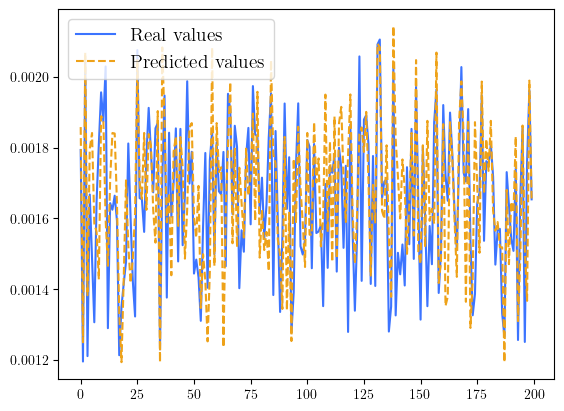

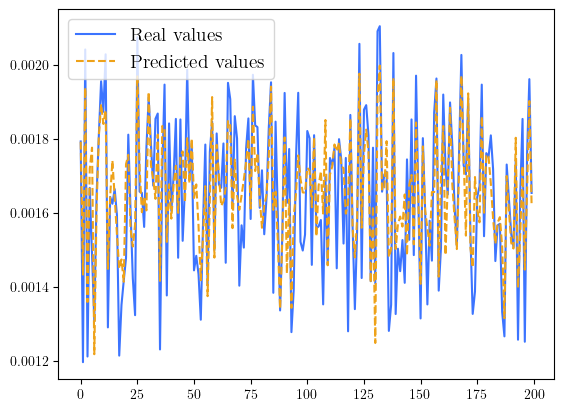

In [155]:
pretty_blue = '#3C74FF'
nice_orange = '#EEA219'

x=np.arange(0,len(y_test_k),1)

fig1_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_lr_k, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig_true_predict_k, ax = plt.subplots()
plt.plot(y_predict_lr_k, y_test_k, 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.tight_layout()
plt.savefig('./figures/kernel-regression-true-predict.eps',format='eps',dpi=300)
plt.show()

fig2_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_mlp_k, '--', color=nice_orange, label='Predicted values')

fig3_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_svr_k, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig4_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_dt_k, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig5_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_rf_k, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

#fig6_k = plt.figure()
#plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
#plt.plot(x,test_predictions, '--', color=nice_orange, label='Predicted values')
#plt.legend()
#plt.show()


### Kernel --> Bound

In [156]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#std = StandardScaler()
#X_train_k_std = std.fit_transform(X_train_k, y_train_k)
#X_test_k_std = std.transform(X_test_k)

#### Regression Models

In [157]:
lr = LinearRegression()
lr.fit(X_train_k_std, y_train_k)
y_predict_lr_k = lr.predict(X_test_k_b_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_k_std, y_train_k)
y_predict_svr_k = svr.predict(X_test_k_b_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
mse_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_k_std, y_train_k)
    y_predict_dt_k = dt.predict(X_test_k_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_dt_k)
    mse = metrics.mean_squared_error(y_test_b, y_predict_dt_k)
    mae_dt.append(mae)
    mse_dt.append(mse)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

    
mae_rf = []
mse_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_k_std, y_train_k)
    y_predict_rf_k = rf.predict(X_test_k_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_rf_k)
    mse = metrics.mean_squared_error(y_test_b, y_predict_rf_k)
    mae_rf.append(mae)
    mse_rf.append(mse)  

#rf = RandomForestRegressor()
#rf.fit(X_train_k_std, y_train_k)
#y_predict_rf_k = rf.predict(X_test_k_b_std)
# plt.plot(y_test_k)
# plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_lr_k))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_svr_k))
#rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_dt_k))
#rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_rf_k))
rmse_dt = np.mean(mse_dt)
rmse_rf = np.mean(mse_rf)
print('\n', rmse_lr, '\n', rmse_svr, '\n', rmse_dt, '\n', rmse_rf, '\n', )



 0.0004078456524835778 
 0.0006189848249543479 
 2.0374337807403314e-07 
 1.8933588287862952e-07 



## Testing the Bound

### Bound --> Bound

In [158]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel_bound_forKernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
#y_test_k = data_k_test.values[:, -1]

#### Regression models

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

mlp = MLPRegressor(learning_rate='adaptive')
mlp.fit(X_train_b_std, y_train_b)
y_predict_mlp_b = mlp.predict(X_test_b_b_std)

lr = LinearRegression()
lr.fit(X_train_b_std, y_train_b)
y_predict_lr_b = lr.predict(X_test_b_b_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_b_std, y_train_b)
y_predict_svr_b = svr.predict(X_test_b_b_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
rmse_dt = []
r2_dt = []
mape_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_b_std, y_train_b)
    y_predict_dt_b = dt.predict(X_test_b_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_dt_b)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_dt_b))
    r2 = r2_score(y_test_b, y_predict_dt_b)
    mape = mean_absolute_percentage_error(y_test_b, y_predict_dt_b)
    mae_dt.append(mae)
    rmse_dt.append(rmse)
    r2_dt.append(r2)
    mape_dt.append(mape)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

mae_rf = []
rmse_rf = []
r2_rf = []
mape_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_b_std, y_train_b)
    y_predict_rf_b = rf.predict(X_test_b_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_rf_b)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_rf_b))
    r2 = r2_score(y_test_b, y_predict_rf_b)
    mape = mean_absolute_percentage_error(y_test_b, y_predict_rf_b)
    mae_rf.append(mae)
    rmse_rf.append(rmse)
    r2_rf.append(r2)
    mape_rf.append(mape)
    # plt.plot(y_test_k)
    # plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_lr_b))
rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_mlp_b))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_svr_b))
rmse_dt = np.mean(rmse_dt)
rmse_rf = np.mean(rmse_rf)
mae_lr = metrics.mean_absolute_error(y_test_b, y_predict_lr_b)
mae_mlp = metrics.mean_absolute_error(y_test_b, y_predict_mlp_b)
mae_svr = metrics.mean_absolute_error(y_test_b, y_predict_svr_b)
mae_dt = np.mean(mae_dt)
mae_rf = np.mean(mae_rf)
r2_lr = r2_score(y_test_b, y_predict_lr_b)
r2_mlp = r2_score(y_test_b, y_predict_mlp_b)
r2_svr = r2_score(y_test_b, y_predict_svr_b)
r2_dt = np.mean(r2_dt)
r2_rf = np.mean(r2_rf)
mape_lr = mean_absolute_percentage_error(y_test_b, y_predict_svr_b)
mape_mlp = mean_absolute_percentage_error(y_test_b, y_predict_mlp_b)
mape_svr = mean_absolute_percentage_error(y_test_b, y_predict_svr_b)
mape_dt = np.mean(mape_dt)
mape_rf = np.mean(mape_rf)

print('Root Mean Squared Error:''\n', 'LR: ''\t', rmse_lr, '\n', 'MLP: ''\t', rmse_mlp, '\n', 'SVR: ''\t', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
print('Mean Absolute Error:''\n', 'LR: ''\t', mae_lr, '\n', 'MLP: ''\t', mae_mlp, '\n', 'SVR: ''\t', mae_svr, '\n', 'DT: ''\t', mae_dt, '\n', 'RF: ''\t', mae_rf, '\n', )
print('R2 Score:''\n', 'LR: ''\t', r2_lr, '\n', 'MLP: ''\t', r2_mlp, '\n', 'SVR: ''\t', r2_svr, '\n', 'DT: ''\t', r2_dt, '\n', 'RF: ''\t', r2_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_lr, '\n', 'MLP: ''\t', mape_mlp, '\n', 'SVR: ''\t', mape_svr, '\n', 'DT: ''\t', mape_dt, '\n', 'RF: ''\t', mape_rf, '\n', )

Root Mean Squared Error:
 LR: 	 4.786794414044892e-06 
 MLP: 	 0.035458764775321595 
 SVR: 	 8.704511070502745e-05 
 DT: 	 1.5703190025619624e-05 
 RF: 	 9.31202278337572e-06 

Mean Absolute Error:
 LR: 	 3.7715480212186665e-06 
 MLP: 	 0.026951888364318215 
 SVR: 	 7.42262781294635e-05 
 DT: 	 1.2006743746182595e-05 
 RF: 	 6.937684884103214e-06 

R2 Score:
 LR: 	 0.9969423848253498 
 MLP: 	 -167779.11172883652 
 SVR: 	 -0.011071893869620597 
 DT: 	 0.9670721665895835 
 RF: 	 0.9884266711784709 

MAPE Score:
 LR: 	 0.0701439790629852 
 MLP: 	 25.833116052054002 
 SVR: 	 0.0701439790629852 
 DT: 	 0.011511228023020952 
 RF: 	 0.006654964871705328 



#### ML vs True comparison

In [160]:
test_df_b = X_test_b.copy()
test_df_b = test_df_b.rename(columns={0:'E_s',1:'f_y',2:'f_ct',3:'A_s',4:'A_c',5:'M'})
test_df_b.insert(len(test_df_b.columns), 'true', y_test_b)
test_df_b.insert(len(test_df_b.columns), 'lr_predict', y_predict_lr_b)
test_df_b.insert(len(test_df_b.columns), 'mlp_predict', y_predict_mlp_b)
test_df_b.insert(len(test_df_b.columns), 'svr_predict', y_predict_svr_b)
test_df_b.insert(len(test_df_b.columns), 'dt_predict', y_predict_dt_b)
test_df_b.insert(len(test_df_b.columns), 'rf_predict', y_predict_rf_b)
test_df_b

E_s         f_y      f_ct         A_s            A_c  \
915  198965.624927  425.315253  4.024111   77.207413   13353.625246   
844  201855.993693  457.106767  3.095277  312.930982   93862.799124   
176  203386.128633  494.527636  3.355367  125.564146   33497.133507   
719  203847.473139  421.189873  2.910622  168.241507   43861.089450   
251  200991.351470  478.541851  3.746897  227.549968   57070.935022   
..             ...         ...       ...         ...            ...   
607  198938.825509  466.831338  3.840814  759.059174  219263.724809   
673  196873.704776  477.230162  4.033282  106.577553   22285.195666   
292  196251.197744  432.681448  3.984858   31.594655    5079.426874   
435  199633.464681  419.490402  3.843701   28.734379    4546.555506   
100  199855.036189  493.521676  2.709319   58.342992   17410.155517   

               M      true  lr_predict  mlp_predict  svr_predict  dt_predict  \
915   710.096229  0.000954    0.000952    -0.049071      0.00105    0.000984   
844  1429.591595  0.001076    0.001075    -0.052718      0.00105    0.001073   
176   905.566875  0.001122    0.001119     0.045131      0.00105    0.001125   
719  1048.224437  0.000952    0.000944     0.035361      0.00105    0.000936   
251  1219.062842  0.001122    0.001119    -0.026329      0.00105    0.001127   
..           ...       ...         ...          ...          ...         ...   
607  2226.514468  0.001148    0.001150     0.002208      0.00105    0.001153   
673   834.296799  0.001110    0.001107    -0.005555      0.00105    0.001089   
292   454.249560  0.000943    0.000958    -0.073965      0.00105    0.000923   
435   433.200163  0.000889    0.000903    -0.042923      0.00105    0.000877   
100   617.279782  0.001103    0.001106     0.037062      0.00105    0.001138   

     rf_predict  
915    0.000954  
844    0.001078  
176    0.001128  
719    0.000951  
251    0.001129  
..          ...  
607    0.001145  
673    0.001090  
292    0.000929  
435    0.000890  
100    0.001117  

[200 rows x 12 columns]

In [161]:
train_df_b = X_train_b.copy()
train_df_b = train_df_b.rename(columns={0:'E_s',1:'f_y',2:'f_ct',3:'A_s',4:'A_c',5:'M'})
train_df_b.insert(len(train_df_b.columns), 'true', y_train_b)
train_df_b.insert(len(train_df_b.columns), 'lr_predict', lr.predict(X_train_b_std))
train_df_b.insert(len(train_df_b.columns), 'mlp_predict', mlp.predict(X_train_b_std))
train_df_b.insert(len(train_df_b.columns), 'svr_predict', svr.predict(X_train_b_std))
train_df_b.insert(len(train_df_b.columns), 'dt_predict', dt.predict(X_train_b_std))
train_df_b.insert(len(train_df_b.columns), 'rf_predict', rf.predict(X_train_b_std))
train_df_b

E_s         f_y      f_ct         A_s            A_c  \
945  195683.664325  490.286510  3.623691  912.162091  309827.559817   
691  202030.926496  487.098848  3.115144  492.582370  171730.345964   
391  195501.483123  420.262232  3.326640  370.408284   96009.628091   
110  200918.603305  497.810138  4.067252  172.279458   40187.457314   
709  195798.935002  469.853203  2.697440  166.921266   54634.934607   
..             ...         ...       ...         ...            ...   
286  196060.253526  445.250202  2.579781  707.881636  283731.313346   
811  202195.961282  410.521364  3.929400  835.279931  200661.862474   
73   195755.071630  436.780011  3.851631  388.344663   92115.033133   
726  204394.892653  411.685741  3.115774  616.035001  177461.359032   
465  199949.849929  404.921427  3.405580  204.634525   44823.158297   

               M      true  lr_predict  mlp_predict  svr_predict  dt_predict  \
945  2440.752340  0.001237    0.001233    -0.036919      0.00105    0.001237   
691  1793.606367  0.001167    0.001170    -0.015220      0.00105    0.001167   
391  1555.349702  0.001023    0.001025     0.014816      0.00105    0.001023   
110  1060.729027  0.001159    0.001156    -0.002515      0.00105    0.001159   
709  1044.103471  0.001119    0.001112    -0.009238      0.00105    0.001119   
..           ...       ...         ...          ...          ...         ...   
286  2150.146382  0.001107    0.001113     0.066191      0.00105    0.001107   
811  2335.628297  0.000988    0.000990     0.005303      0.00105    0.000988   
73   1592.562096  0.001067    0.001068     0.019438      0.00105    0.001067   
726  2005.812801  0.000971    0.000973    -0.008981      0.00105    0.000971   
465  1156.051439  0.000939    0.000934     0.003165      0.00105    0.000939   

     rf_predict  
945    0.001234  
691    0.001171  
391    0.001017  
110    0.001154  
709    0.001121  
..          ...  
286    0.001106  
811    0.000984  
73     0.001064  
726    0.000973  
465    0.000941  

[800 rows x 12 columns]

In [162]:
df_b = pd.concat([train_df_b, test_df_b], ignore_index=True, axis=0)
df_b.to_csv(f'./data/boundary{n_bound}-with-predictions.csv', index=False)
df_b

E_s         f_y      f_ct         A_s            A_c  \
0    195683.664325  490.286510  3.623691  912.162091  309827.559817   
1    202030.926496  487.098848  3.115144  492.582370  171730.345964   
2    195501.483123  420.262232  3.326640  370.408284   96009.628091   
3    200918.603305  497.810138  4.067252  172.279458   40187.457314   
4    195798.935002  469.853203  2.697440  166.921266   54634.934607   
..             ...         ...       ...         ...            ...   
995  198938.825509  466.831338  3.840814  759.059174  219263.724809   
996  196873.704776  477.230162  4.033282  106.577553   22285.195666   
997  196251.197744  432.681448  3.984858   31.594655    5079.426874   
998  199633.464681  419.490402  3.843701   28.734379    4546.555506   
999  199855.036189  493.521676  2.709319   58.342992   17410.155517   

               M      true  lr_predict  mlp_predict  svr_predict  dt_predict  \
0    2440.752340  0.001237    0.001233    -0.036919      0.00105    0.001237   
1    1793.606367  0.001167    0.001170    -0.015220      0.00105    0.001167   
2    1555.349702  0.001023    0.001025     0.014816      0.00105    0.001023   
3    1060.729027  0.001159    0.001156    -0.002515      0.00105    0.001159   
4    1044.103471  0.001119    0.001112    -0.009238      0.00105    0.001119   
..           ...       ...         ...          ...          ...         ...   
995  2226.514468  0.001148    0.001150     0.002208      0.00105    0.001153   
996   834.296799  0.001110    0.001107    -0.005555      0.00105    0.001089   
997   454.249560  0.000943    0.000958    -0.073965      0.00105    0.000923   
998   433.200163  0.000889    0.000903    -0.042923      0.00105    0.000877   
999   617.279782  0.001103    0.001106     0.037062      0.00105    0.001138   

     rf_predict  
0      0.001234  
1      0.001171  
2      0.001017  
3      0.001154  
4      0.001121  
..          ...  
995    0.001145  
996    0.001090  
997    0.000929  
998    0.000890  
999    0.001117  

[1000 rows x 12 columns]

##### Eq 1

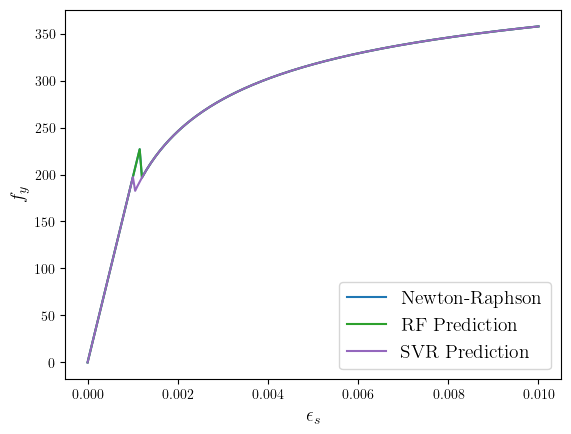

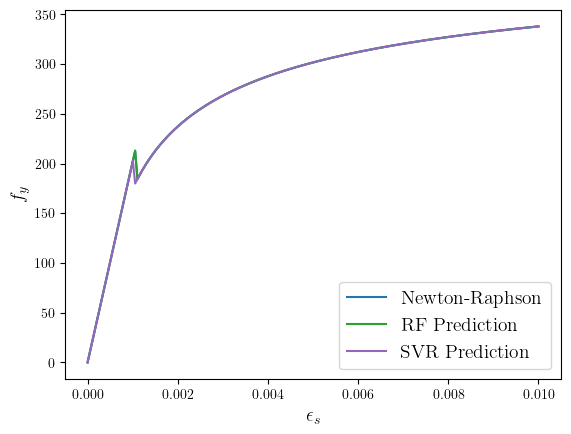

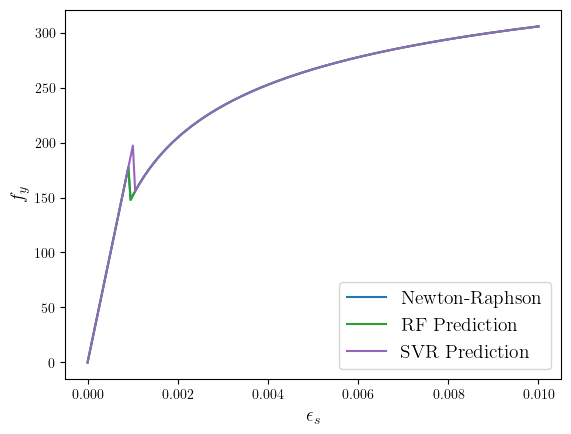

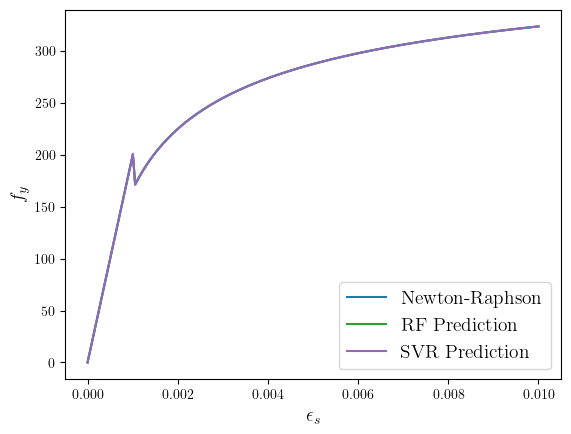

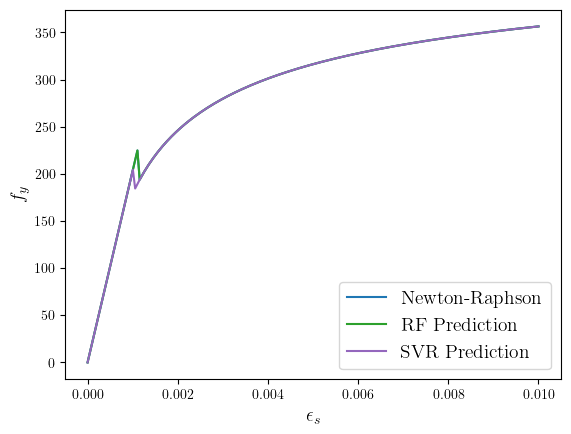

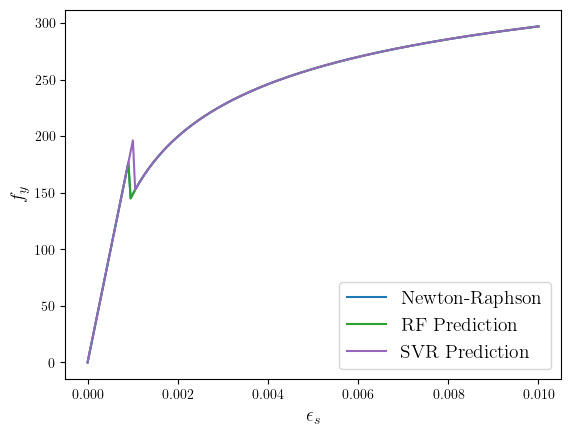

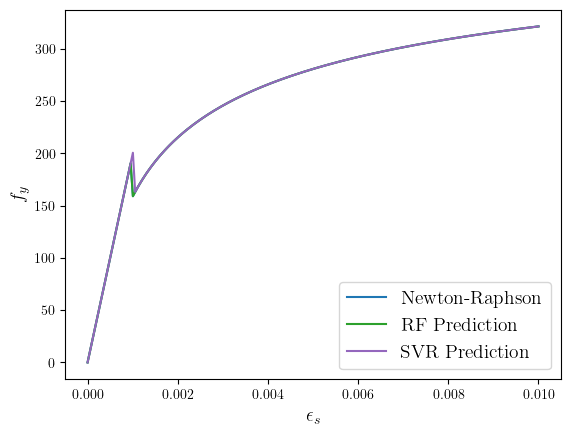

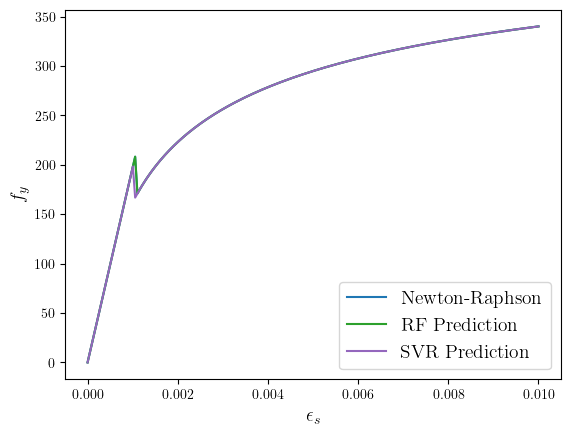

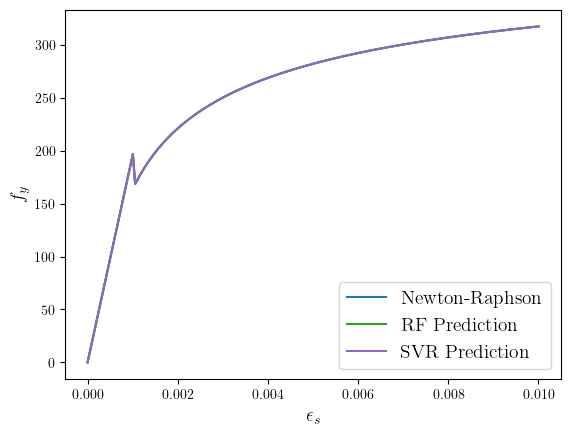

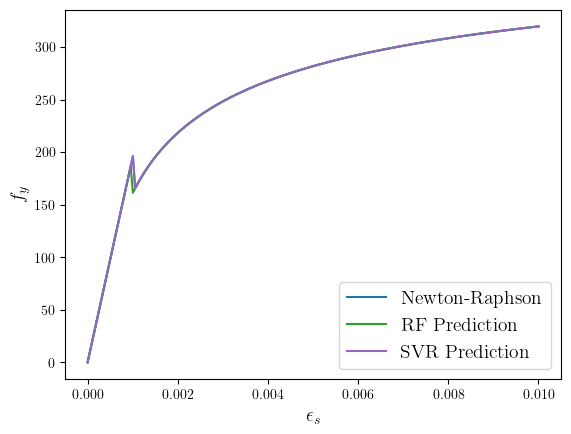

In [163]:
E_s = np.array(test_df_b.get('E_s'))
f_y = np.array(test_df_b.get('f_y'))
f_ct = np.array(test_df_b.get('f_ct'))
A_s = np.array(test_df_b.get('A_s'))
A_c = np.array(test_df_b.get('A_c'))
M = np.array(test_df_b.get('M'))
epsilon_max = np.array(test_df_b.get('true'))
epsilon_rf = np.array(test_df_b.get('rf_predict'))
epsilon_svr = np.array(test_df_b.get('svr_predict'))

epsilon_s = np.linspace(0, 0.01, 200)#np.array([i*0.0001%0.001 for i in range(1000)])

#idxs = np.random.choice(np.arange(len(epsilon_max)), 10, replace=False)
#print(idxs)

for idx in idxs:
    mask = epsilon_s >= epsilon_max[idx]

    sigma = np.zeros(np.shape(epsilon_max)) + E_s[idx] * epsilon_s
    sigma[mask] = f_y[idx] - ((A_c[idx] * f_ct [idx])/(A_s[idx] * (1 + np.sqrt(3.6 * M[idx] * epsilon_s[mask]))))

    mask_rf = epsilon_s >= epsilon_rf[idx]

    sigma_rf = np.zeros(np.shape(epsilon_rf)) + E_s[idx] * epsilon_s
    sigma_rf[mask_rf] = f_y[idx] - ((A_c[idx] * f_ct [idx])/(A_s[idx] * (1 + np.sqrt(3.6 * M[idx] * epsilon_s[mask_rf]))))

    mask_svr = epsilon_s >= epsilon_svr[idx]

    sigma_svr = np.zeros(np.shape(epsilon_rf)) + E_s[idx] * epsilon_s
    sigma_svr[mask_svr] = f_y[idx] - ((A_c[idx] * f_ct [idx])/(A_s[idx] * (1 + np.sqrt(3.6 * M[idx] * epsilon_s[mask_svr]))))

    plt.figure()
    plt.plot(epsilon_s, sigma, color='tab:blue', label = 'Newton-Raphson')
    #plt.axvline(x=epsilon_max[idx], color = 'tab:orange',label='epsilon_max Newton-Raphson')
    plt.plot(epsilon_s, sigma_rf, color='tab:green', label = 'RF Prediction')
    #plt.axvline(x=epsilon_rf[idx], color = 'tab:red', label='epsilon_max RF Prediction')
    plt.plot(epsilon_s, sigma_svr, color='tab:purple', label = 'SVR Prediction')
    #plt.axvline(x=epsilon_svr[idx], color = 'tab:brown', label='epsilon_max SVR Prediction')
    plt.ylabel('$f_y$')
    plt.xlabel('$\epsilon_s$')
    plt.legend()
    plt.show()


##### Monte-carlo sampling

In [164]:
from sklearn.kernel_approximation import RBFSampler

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_true = rbf_feature.fit_transform(np.reshape([df_b.get('true')], (1000, 1)))

# d_lr_pred =rbf_feature.transform(np.reshape([df_b.get('lr_predict')], (1000, 1))) 

# d_mlp_pred =rbf_feature.transform(np.reshape([df_b.get('mlp_predict')], (1000, 1))) 

# d_svr_pred =rbf_feature.transform(np.reshape([df_b.get('svr_predict')], (1000, 1))) 

# d_dt_pred =rbf_feature.transform(np.reshape([df_b.get('dt_predict')], (1000, 1))) 

# d_rf_pred =rbf_feature.transform(np.reshape([df_b.get('rf_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_lr_pred =rbf_feature.fit_transform(np.reshape([df_b.get('lr_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_mlp_pred =rbf_feature.fit_transform(np.reshape([df_b.get('mlp_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_svr_pred =rbf_feature.fit_transform(np.reshape([df_b.get('svr_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_dt_pred =rbf_feature.fit_transform(np.reshape([df_b.get('dt_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_rf_pred =rbf_feature.fit_transform(np.reshape([df_b.get('rf_predict')], (1000, 1))) 

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 17 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 16 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


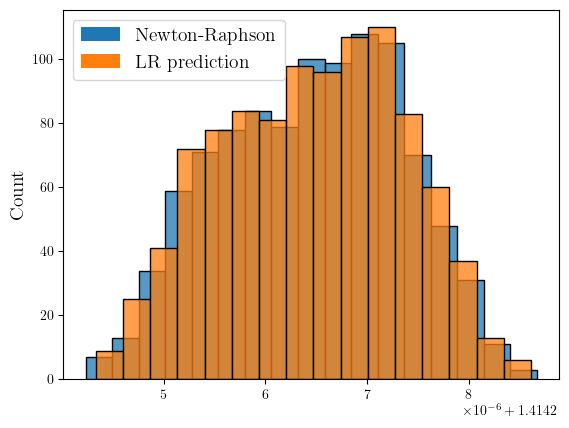

In [165]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_lr_pred).flatten(), legend=False)
plt.legend(labels = ['Newton-Raphson', '_A_','LR prediction', '_A_'])
plt.savefig('./figures/bound-montecarlo-lr.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 17 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 104 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


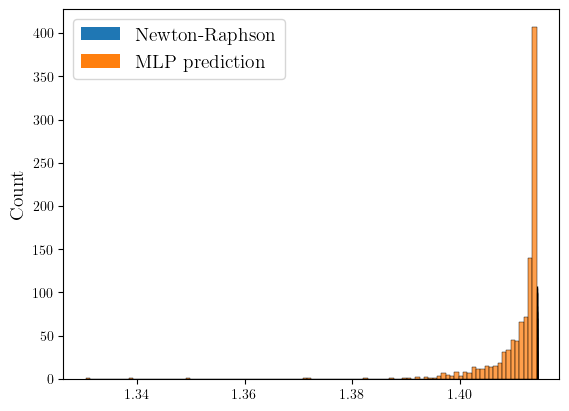

In [166]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_mlp_pred).flatten(), legend=False)
plt.legend(labels = ['Newton-Raphson', '_A_','MLP prediction', '_A_'])
plt.savefig('./figures/bound-montecarlo-mlp.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 17 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 1 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


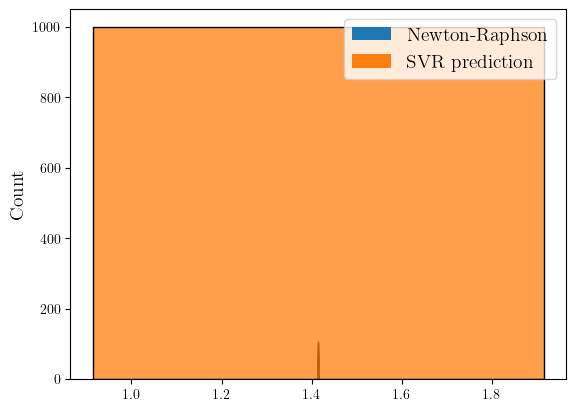

In [167]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_svr_pred).flatten(), legend=False)
plt.legend(labels = ['Newton-Raphson', '_A_','SVR prediction', '_A_'])
plt.savefig('./figures/bound-montecarlo-svr.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 17 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


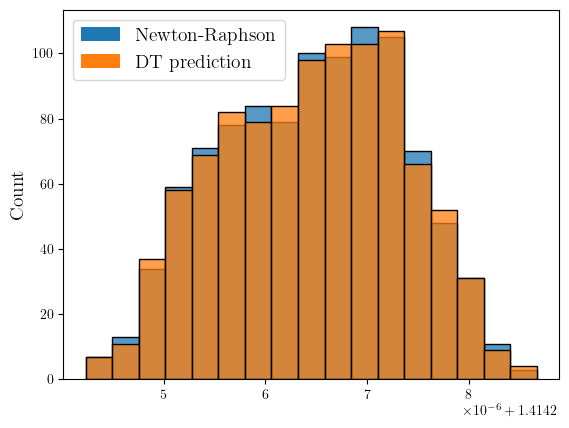

In [168]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_dt_pred).flatten(), legend=False)
plt.legend(labels = ['Newton-Raphson', '_A_','DT prediction', '_A_'])
plt.savefig('./figures/bound-montecarlo-dt.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 17 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 16 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


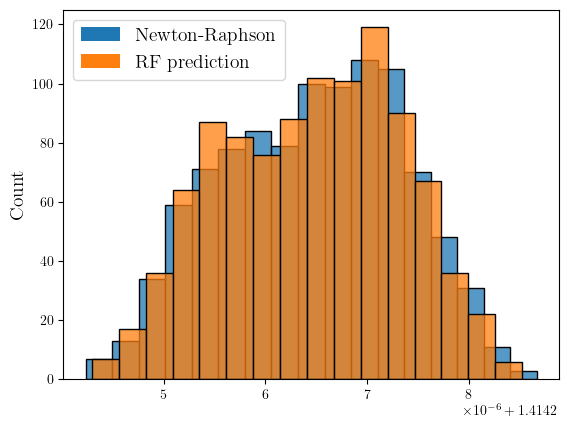

In [169]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_rf_pred).flatten(), legend=False)
plt.legend(labels = ['Newton-Raphson', '_A_','RF prediction', '_A_'])
plt.savefig('./figures/bound-montecarlo-rf.png')

### Heat map

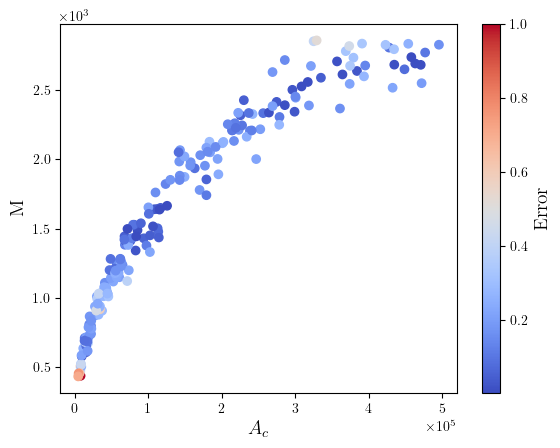

In [170]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_b)
col1 = np.abs(y_test_b - y_predict_lr_b)
col1 = col1/col1.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='coolwarm')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"Error"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/heatmap-bound-error-predictwithclass.eps',format='eps',dpi=300)
plt.show()

In [171]:
#X_test_heatmap_b = pd.DataFrame(X_test_b)
#X_test_heatmap_b = X_test_heatmap_b.assign(A = y_predict_lr_b)
#X_test_heatmap_b = X_test_heatmap_b.drop(columns=[0,1,2,5])
#X_test_heatmap_b.to_csv("predict-bound.csv",index=False, header=False)

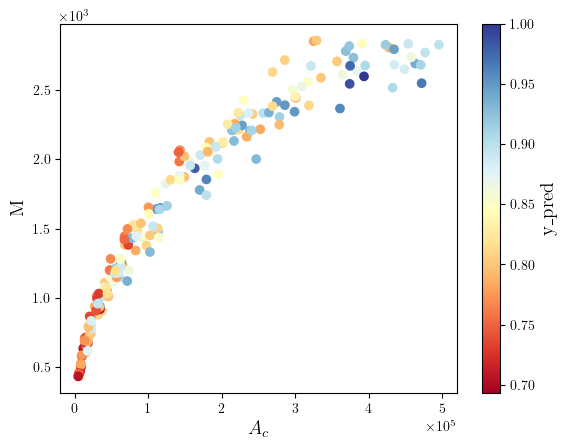

In [172]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_b)
col2 = y_test_b
col2 = col2/col2.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col2, cmap='RdYlBu')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"y_pred"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/heatmap-bound-real.eps',format='eps',dpi=300)
plt.show()

In [173]:
col_bool = col1 == col2
col_bool[col_bool==True]

Series([], Name: 6, dtype: bool)

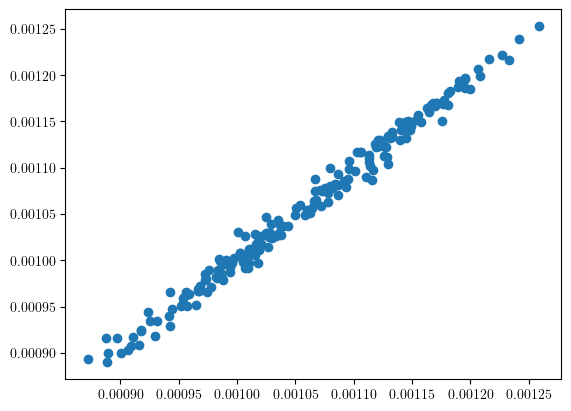

In [174]:
figsct_b1 = plt.figure()
plt.scatter(y_test_b, y_predict_rf_b)


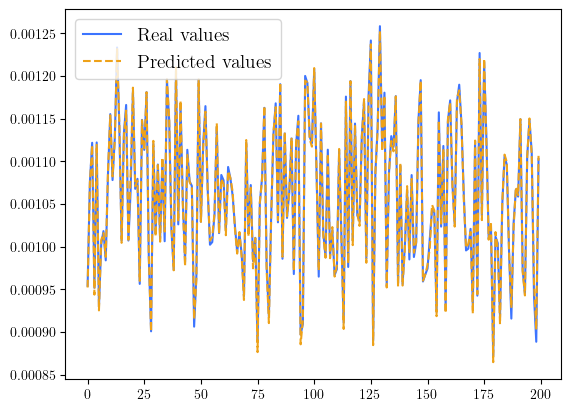

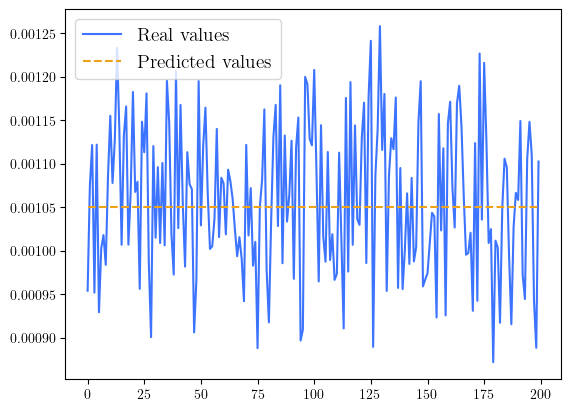

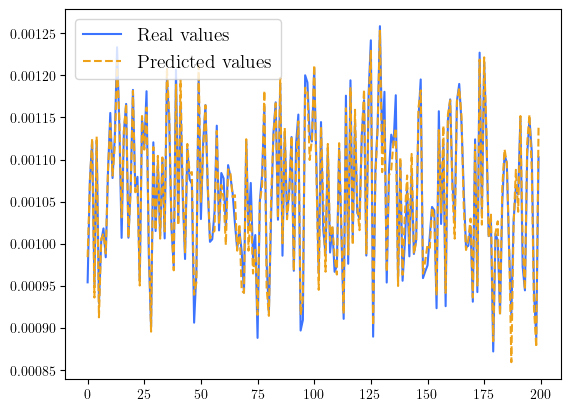

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


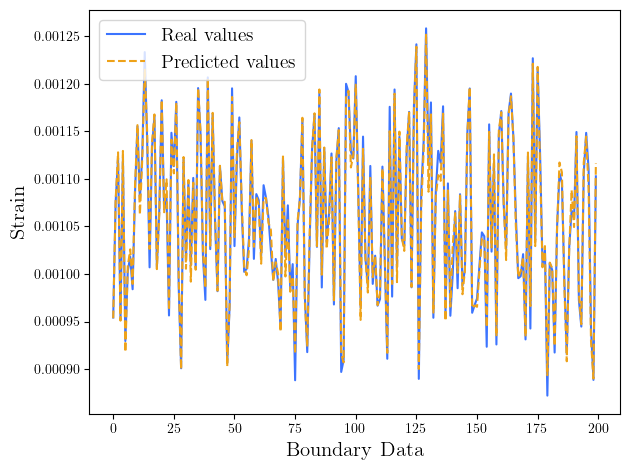

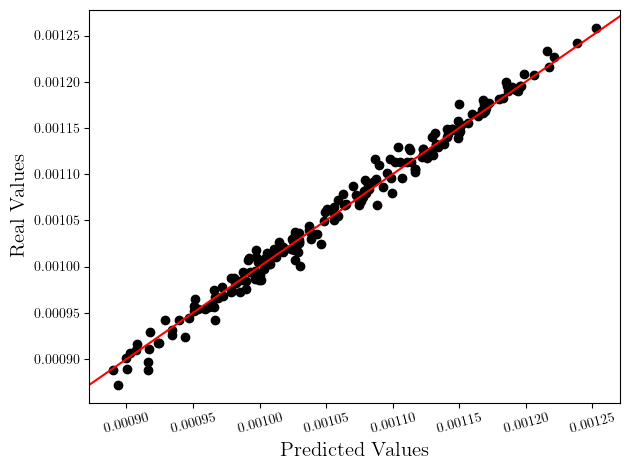

In [175]:
x=np.arange(0,len(y_test_b),1)

fig1_b = plt.figure()
plt.plot(x,y_test_b, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_lr_b, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig2_b = plt.figure()
plt.plot(x,y_test_b, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_svr_b, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig3_b = plt.figure()
plt.plot(x,y_test_b, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_dt_b, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig4_b = plt.figure()
plt.plot(x,y_test_b, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_rf_b, '--', color=nice_orange, label='Predicted values')
plt.xlabel('Boundary Data', fontsize=15)
plt.ylabel('Strain', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/bound-regression.eps',format='eps',dpi=300)
plt.savefig('./figures/bound-regression.svg')
plt.show()

fig_true_predict_b, ax = plt.subplots()
plt.plot(y_predict_rf_b, y_test_b, 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('./figures/bound-regression-true-predict.eps',format='eps',dpi=300)
plt.show()

### Bound --> Kernel

In [176]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#std = StandardScaler()
#X_train_k_std = std.fit_transform(X_train_k, y_train_k)
#X_test_k_std = std.transform(X_test_k)

#### Regression Models

In [177]:
lr = LinearRegression()
lr.fit(X_train_b_std, y_train_b)
y_predict_lr_b = lr.predict(X_test_b_k_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_b_std, y_train_b)
y_predict_svr_b = svr.predict(X_test_b_k_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
mse_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_b_std, y_train_b)
    y_predict_dt_b = dt.predict(X_test_b_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_dt_b)
    mse = metrics.mean_squared_error(y_test_k, y_predict_dt_b)
    mae_dt.append(mae)
    mse_dt.append(mse)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

    
mae_rf = []
mse_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_b_std, y_train_b)
    y_predict_rf_b = rf.predict(X_test_b_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_rf_b)
    mse = metrics.mean_squared_error(y_test_k, y_predict_rf_b)
    mae_rf.append(mae)
    mse_rf.append(mse)  

#rf = RandomForestRegressor()
#rf.fit(X_train_k_std, y_train_k)
#y_predict_rf_k = rf.predict(X_test_k_b_std)
# plt.plot(y_test_k)
# plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_lr_b))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_svr_b))
#rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_dt_b))
#rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_rf_b))
rmse_dt = np.mean(mse_dt)
rmse_rf = np.mean(mse_rf)
print('\n', rmse_lr, '\n', rmse_svr, '\n', rmse_dt, '\n', rmse_rf, '\n', )





 0.0006116131301780977 
 0.0006331369772361947 
 3.888819119290575e-07 
 3.8460284740717376e-07 



## Testing the Kernel + Bound

### Kernel + Bound --> Kernel

In [178]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel_bound_forKernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#### Regression models

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train_kb_std, y_train_kb)
y_predict_lr_kb = lr.predict(X_test_kb_k_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_kb_std, y_train_kb)
y_predict_svr_kb = svr.predict(X_test_kb_k_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
mse_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_kb_std, y_train_kb)
    y_predict_dt_kb = dt.predict(X_test_kb_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_dt_kb)
    mse = metrics.mean_squared_error(y_test_k, y_predict_dt_kb)
    mae_dt.append(mae)
    mse_dt.append(mse)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

mae_rf = []
mse_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_kb_std, y_train_kb)
    y_predict_rf_kb = rf.predict(X_test_kb_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_rf_kb)
    mse = metrics.mean_squared_error(y_test_k, y_predict_rf_kb)
    mae_rf.append(mae)
    mse_rf.append(mse)
    # plt.plot(y_test_k)
    # plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_lr_kb))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_svr_kb))
#rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_dt_k))
#rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_rf_k))
rmse_dt = np.mean(mse_dt)
rmse_rf = np.mean(mse_rf)
print('\n', rmse_lr, '\n', rmse_svr, '\n', rmse_dt, '\n', rmse_rf, '\n', )
#print(mse_dt, mse_rf)


 0.0002275189914976134 
 0.00024022819862193652 
 3.4789753625462026e-08 
 1.1947927778180419e-08 



### Kernel + Bound --> Bound

In [180]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#std = StandardScaler()
#X_train_k_std = std.fit_transform(X_train_k, y_train_k)
#X_test_k_std = std.transform(X_test_k)

#### Regression Models

In [181]:
lr = LinearRegression()
lr.fit(X_train_kb_std, y_train_kb)
y_predict_lr_kb = lr.predict(X_test_kb_b_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_kb_std, y_train_kb)
y_predict_svr_kb = svr.predict(X_test_kb_b_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
mse_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_kb_std, y_train_kb)
    y_predict_dt_kb = dt.predict(X_test_kb_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_dt_kb)
    mse = metrics.mean_squared_error(y_test_b, y_predict_dt_kb)
    mae_dt.append(mae)
    mse_dt.append(mse)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

    
mae_rf = []
mse_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_kb_std, y_train_kb)
    y_predict_rf_kb = rf.predict(X_test_kb_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_rf_kb)
    mse = metrics.mean_squared_error(y_test_b, y_predict_rf_kb)
    mae_rf.append(mae)
    mse_rf.append(mse)  

#rf = RandomForestRegressor()
#rf.fit(X_train_k_std, y_train_k)
#y_predict_rf_k = rf.predict(X_test_k_b_std)
# plt.plot(y_test_k)
# plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_lr_kb))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_svr_kb))
#rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_dt_k))
#rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_rf_k))
rmse_dt = np.mean(mse_dt)
rmse_rf = np.mean(mse_rf)
print('\n', rmse_lr, '\n', rmse_svr, '\n', rmse_dt, '\n', rmse_rf, '\n', )



 0.00021030298135935364 
 0.00048278105520422904 
 1.4194692710972338e-08 
 4.28548378734629e-09 



### Kernel + Bound --> Kernel + Bound

In [182]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#std = StandardScaler()
#X_train_k_std = std.fit_transform(X_train_k, y_train_k)
#X_test_k_std = std.transform(X_test_k)

#### Regression Models

In [183]:
mlp = MLPRegressor(learning_rate='adaptive')
mlp.fit(X_train_kb_std, y_train_kb)
y_predict_mlp_kb = mlp.predict(X_test_kb_std)
y_predict_mlp_kernel = y_predict_mlp_kb[y_test_class==0]
y_predict_mlp_bound = y_predict_mlp_kb[y_test_class==1]

lr = LinearRegression()
lr.fit(X_train_kb_std, y_train_kb)
y_predict_lr_kb = lr.predict(X_test_kb_std)
y_predict_lr_kernel = y_predict_lr_kb[y_test_class==0]
y_predict_lr_bound = y_predict_lr_kb[y_test_class==1]
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_kb_std, y_train_kb)
y_predict_svr_kb = svr.predict(X_test_kb_std)
y_predict_svr_kernel = y_predict_svr_kb[y_test_class==0]
y_predict_svr_bound = y_predict_svr_kb[y_test_class==1]
# plt.plot(y_predict_svr_k)

mae_dt = []
rmse_dt = []
r2_dt = []
mape_dt = []

mae_k_dt = []
rmse_k_dt = []
r2_k_dt = []
mape_k_dt = []

mae_b_dt = []
rmse_b_dt = []
r2_b_dt = []
mape_b_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_kb_std, y_train_kb)
    y_predict_dt_kb = dt.predict(X_test_kb_std)
    y_predict_dt_kernel = y_predict_dt_kb[y_test_class==0]
    y_predict_dt_bound = y_predict_dt_kb[y_test_class==1]
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_kb, y_predict_dt_kb)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_dt_kb))
    r2 = r2_score(y_test_kb, y_predict_dt_kb)
    mape = mean_absolute_percentage_error(y_test_kb, y_predict_dt_kb)

    mae_k = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_dt_kernel)
    rmse_k = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==0], y_predict_dt_kernel))
    r2_k = r2_score(y_test_kb[y_test_class==0], y_predict_dt_kernel)
    mape_k = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_dt_kernel)

    mae_b = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_dt_bound)
    rmse_b = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_dt_bound))
    r2_b = r2_score(y_test_kb[y_test_class==1], y_predict_dt_bound)
    mape_b = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_dt_bound)

    mae_dt.append(mae)
    rmse_dt.append(rmse)
    r2_dt.append(r2)
    mape_dt.append(mape)

    mae_k_dt.append(mae_k)
    rmse_k_dt.append(rmse_k)
    r2_k_dt.append(r2_k)
    mape_k_dt.append(mape_k)

    mae_b_dt.append(mae_b)
    rmse_b_dt.append(rmse_b)
    r2_b_dt.append(r2_b)
    mape_b_dt.append(mape_b)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

    
mae_rf = []
rmse_rf = []
r2_rf = []
mape_rf = []

mae_k_rf = []
rmse_k_rf = []
r2_k_rf = []
mape_k_rf= []

mae_b_rf = []
rmse_b_rf = []
r2_b_rf = []
mape_b_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_kb_std, y_train_kb)
    y_predict_rf_kb = rf.predict(X_test_kb_std)
    y_predict_rf_kernel = y_predict_rf_kb[y_test_class==0]
    y_predict_rf_bound = y_predict_rf_kb[y_test_class==1]
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_kb, y_predict_rf_kb)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_rf_kb))
    r2 = r2_score(y_test_kb, y_predict_rf_kb)
    mape = mean_absolute_percentage_error(y_test_kb, y_predict_rf_kb)

    mae_k = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_rf_kernel)
    rmse_k = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_rf_kernel))
    r2_k = r2_score(y_test_kb[y_test_class==0], y_predict_rf_kernel)
    mpae_k = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_rf_kernel)

    mae_b = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_rf_bound)
    rmse_b = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_rf_bound))
    r2_b = r2_score(y_test_kb[y_test_class==1], y_predict_rf_bound)
    mape_b = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_rf_bound)

    mae_rf.append(mae)
    rmse_rf.append(rmse)  
    r2_rf.append(r2)
    mape_rf.append(mape)

    mae_k_rf.append(mae_k)
    rmse_k_rf.append(rmse_k)  
    r2_k_rf.append(r2_k)
    mape_k_rf.append(mape_k)

    mae_b_rf.append(mae_b)
    rmse_b_rf.append(rmse_b)  
    r2_b_rf.append(r2_b)
    mape_b_rf.append(mape_b)

#rf = RandomForestRegressor()
#rf.fit(X_train_k_std, y_train_k)
#y_predict_rf_k = rf.predict(X_test_k_b_std)
# plt.plot(y_test_k)
# plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_lr_kb))
rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_mlp_kb))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_svr_kb))
rmse_dt = np.mean(rmse_dt)
rmse_rf = np.mean(rmse_rf)
mae_lr = metrics.mean_absolute_error(y_test_kb, y_predict_lr_kb)
mae_mlp = metrics.mean_absolute_error(y_test_kb, y_predict_mlp_kb)
mae_svr = metrics.mean_absolute_error(y_test_kb, y_predict_svr_kb)
mae_dt = np.mean(mae_dt)
mae_rf = np.mean(mae_rf)
r2_lr = r2_score(y_test_kb, y_predict_lr_kb)
r2_mlp = r2_score(y_test_kb, y_predict_mlp_kb)
r2_svr = r2_score(y_test_kb, y_predict_svr_kb)
r2_dt = np.mean(r2_dt)
r2_rf = np.mean(r2_rf)
mape_lr = mean_absolute_percentage_error(y_test_kb, y_predict_svr_kb)
mape_mlp = mean_absolute_percentage_error(y_test_kb, y_predict_mlp_kb)
mape_svr = mean_absolute_percentage_error(y_test_kb, y_predict_svr_kb)
mape_dt = np.mean(mape_dt)
mape_rf = np.mean(mape_rf)

rmse_k_lr = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==0], y_predict_lr_kernel))
rmse_k_mlp = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==0], y_predict_mlp_kernel))
rmse_k_svr = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==0], y_predict_svr_kernel))
rmse_k_dt = np.mean(rmse_k_dt)
rmse_k_rf = np.mean(rmse_k_rf)
mae_k_lr = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_lr_kernel)
mae_k_mlp = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_mlp_kernel)
mae_k_svr = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_svr_kernel)
mae_k_dt = np.mean(mae_k_dt)
mae_k_rf = np.mean(mae_k_rf)
r2_k_lr = r2_score(y_test_kb[y_test_class==0], y_predict_lr_kernel)
r2_k_mlp = r2_score(y_test_kb[y_test_class==0], y_predict_mlp_kernel)
r2_k_svr = r2_score(y_test_kb[y_test_class==0], y_predict_svr_kernel)
r2_k_dt = np.mean(r2_k_dt)
r2_k_rf = np.mean(r2_k_rf)
mape_k_lr = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_lr_kernel)
mape_k_mlp = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_mlp_kernel)
mape_k_svr = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_svr_kernel)
mape_k_dt = np.mean(mape_k_dt)
mape_k_rf = np.mean(mape_k_rf)

rmse_b_lr = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_lr_bound))
rmse_b_mlp = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_mlp_bound))
rmse_b_svr = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_svr_bound))
rmse_b_dt = np.mean(rmse_b_dt)
rmse_b_rf = np.mean(rmse_b_rf)
mae_b_lr = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_lr_bound)
mae_b_mlp = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_mlp_bound)
mae_b_svr = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_svr_bound)
mae_b_dt = np.mean(mae_b_dt)
mae_b_rf = np.mean(mae_b_rf)
r2_b_lr = r2_score(y_test_kb[y_test_class==1], y_predict_lr_bound)
r2_b_mlp = r2_score(y_test_kb[y_test_class==1], y_predict_mlp_bound)
r2_b_svr = r2_score(y_test_kb[y_test_class==1], y_predict_svr_bound)
r2_b_dt = np.mean(r2_b_dt)
r2_b_rf = np.mean(r2_b_rf)
mape_b_lr = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_lr_kernel)
mape_b_mlp = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_mlp_kernel)
mape_b_svr = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_svr_kernel)
mape_b_dt = np.mean(mape_b_dt)
mape_b_rf = np.mean(mape_b_rf)

print('Root Mean Squared Error:''\n', 'LR: ''\t', rmse_lr, '\n', 'MLP: ''\t', rmse_mlp, '\n', 'SVR: ''\t', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
print('Mean Absolute Error:''\n', 'LR: ''\t', mae_lr, '\n', 'MLP: ''\t', mae_mlp, '\n', 'SVR: ''\t', mae_svr, '\n', 'DT: ''\t', mae_dt, '\n', 'RF: ''\t', mae_rf, '\n', )
print('R2 Score:''\n', 'LR: ''\t', r2_lr, '\n', 'MLP: ''\t', r2_mlp, '\n', 'SVR: ''\t', r2_svr, '\n', 'DT: ''\t', r2_dt, '\n', 'RF: ''\t', r2_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_lr, '\n', 'MLP: ''\t', mape_mlp, '\n', 'SVR: ''\t', mape_svr, '\n', 'DT: ''\t', mape_dt, '\n', 'RF: ''\t', mape_rf, '\n', )

print('Root Mean Squared Error (kernel):''\n', 'LR: ''\t', rmse_k_lr, '\n', 'MLP: ''\t', rmse_k_mlp, '\n', 'SVR: ''\t', rmse_k_svr, '\n', 'DT: ''\t', rmse_k_dt, '\n', 'RF: ''\t', rmse_k_rf, '\n', )
print('Mean Absolute Error (kernel):''\n', 'LR: ''\t', mae_k_lr, '\n', 'MLP: ''\t', mae_k_mlp, '\n', 'SVR: ''\t', mae_k_svr, '\n', 'DT: ''\t', mae_k_dt, '\n', 'RF: ''\t', mae_k_rf, '\n', )
print('R2 Score (kernel):''\n', 'LR: ''\t', r2_k_lr, '\n', 'MLP: ''\t', r2_k_mlp, '\n', 'SVR: ''\t', r2_k_svr, '\n', 'DT: ''\t', r2_k_dt, '\n', 'RF: ''\t', r2_k_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_k_lr, '\n', 'MLP: ''\t', mape_k_mlp, '\n', 'SVR: ''\t', mape_k_svr, '\n', 'DT: ''\t', mape_k_dt, '\n', 'RF: ''\t', mape_k_rf, '\n', )

print('Root Mean Squared Error (bound):''\n', 'LR: ''\t', rmse_lr, '\n', 'MLP: ''\t', rmse_b_mlp, '\n', 'SVR: ''\t', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
print('Mean Absolute Error (bound):''\n', 'LR: ''\t', mae_b_lr, '\n', 'MLP: ''\t', mae_b_mlp, '\n', 'SVR: ''\t', mae_b_svr, '\n', 'DT: ''\t', mae_b_dt, '\n', 'RF: ''\t', mae_b_rf, '\n', )
print('R2 Score (bound):''\n', 'LR: ''\t', r2_b_lr, '\n', 'MLP: ''\t', r2_b_mlp, '\n', 'SVR: ''\t', r2_b_svr, '\n', 'DT: ''\t', r2_b_dt, '\n', 'RF: ''\t', r2_b_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_b_lr, '\n', 'MLP: ''\t', mape_b_mlp, '\n', 'SVR: ''\t', mape_b_svr, '\n', 'DT: ''\t', mape_b_dt, '\n', 'RF: ''\t', mape_b_rf, '\n', )


Root Mean Squared Error:
 LR: 	 0.00021908016279517838 
 MLP: 	 0.02551585640690647 
 SVR: 	 0.0003813050843335618 
 DT: 	 0.00015744890424194405 
 RF: 	 9.033291152685096e-05 

Mean Absolute Error:
 LR: 	 0.00017619044500171737 
 MLP: 	 0.020285761429653305 
 SVR: 	 0.0003372669063167451 
 DT: 	 9.844488258416852e-05 
 RF: 	 6.566401170700479e-05 

R2 Score:
 LR: 	 0.5734994010127548 
 MLP: 	 -5784.405903115364 
 SVR: 	 -0.29198873765551725 
 DT: 	 0.7796722184367135 
 RF: 	 0.9274788491164078 

MAPE Score:
 LR: 	 0.2878064522039548 
 MLP: 	 15.894083845697656 
 SVR: 	 0.2878064522039548 
 DT: 	 0.07121732019477152 
 RF: 	 0.04893066511522717 

Root Mean Squared Error (kernel):
 LR: 	 0.00022751899149761338 
 MLP: 	 0.024819789643044474 
 SVR: 	 0.00024022819862193652 
 DT: 	 0.0001851439600802704 
 RF: 	 0.000581920801049814 

Mean Absolute Error (kernel):
 LR: 	 0.0001665672088993501 
 MLP: 	 0.020204214502127494 
 SVR: 	 0.0001995773226168918 
 DT: 	 0.00014441023725187825 
 RF: 	 

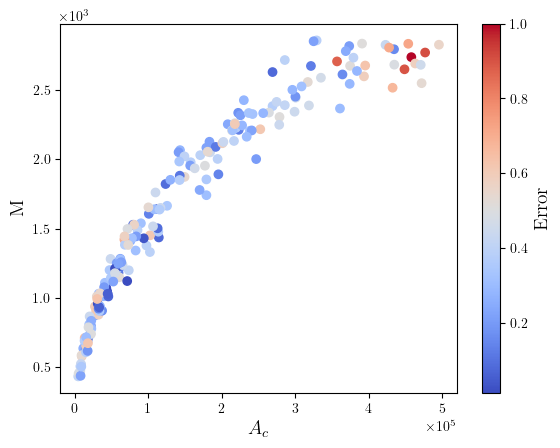

In [184]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_kb[y_test_class==1])
col1 = np.abs(y_test_kb[y_test_class==0] - y_predict_lr_bound)
col1 = col1/col1.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='coolwarm')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"Error"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/heatmap-bound-error-predictwithoutclass.eps',format='eps',dpi=300)
plt.show()

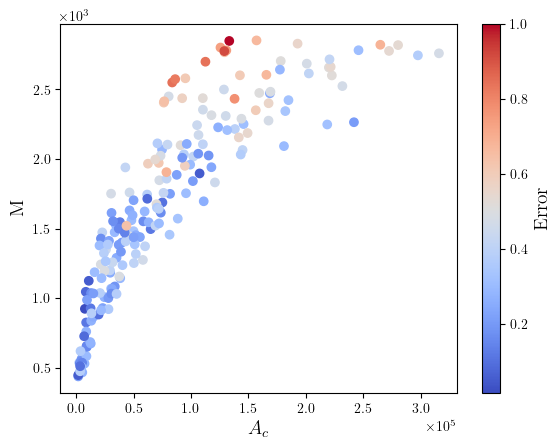

In [185]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_kb[y_test_class==0])
col1 = np.abs(y_test_kb[y_test_class==1] - y_predict_lr_kernel)
col1 = col1/col1.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='coolwarm')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"Error"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/heatmap-kernel-error-predictwithoutclass.eps',format='eps',dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


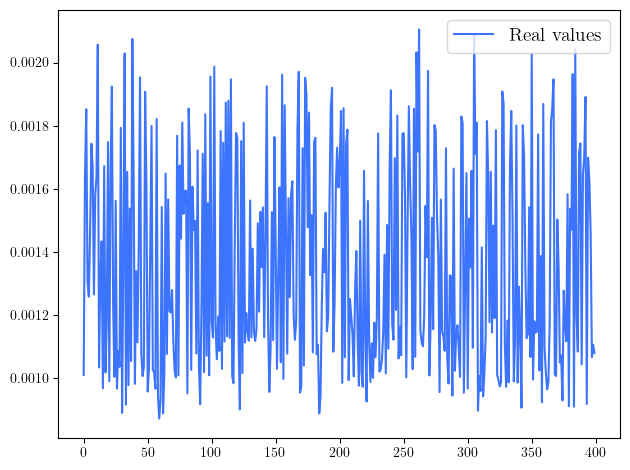

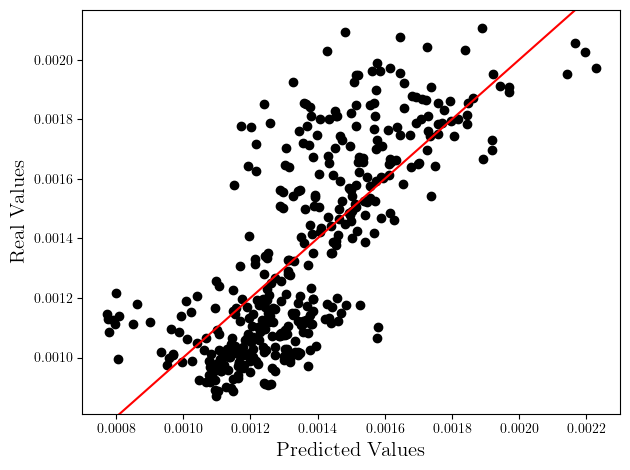

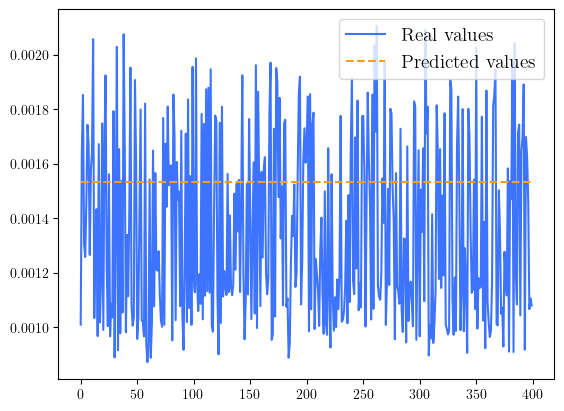

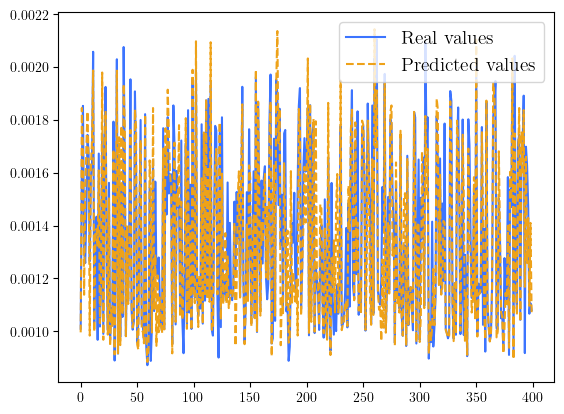

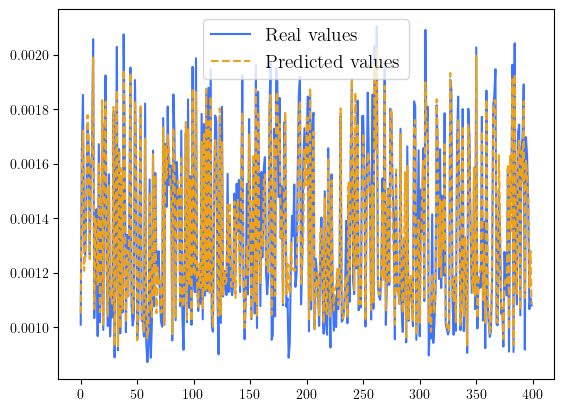

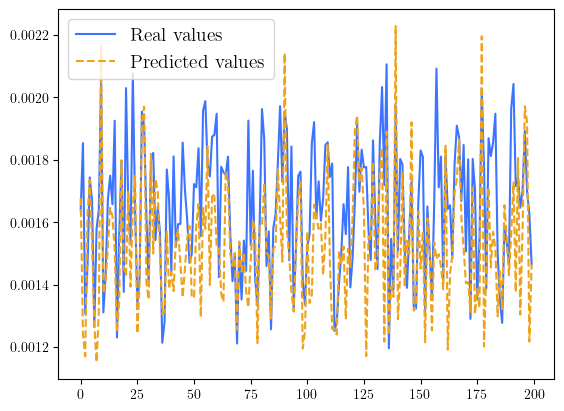

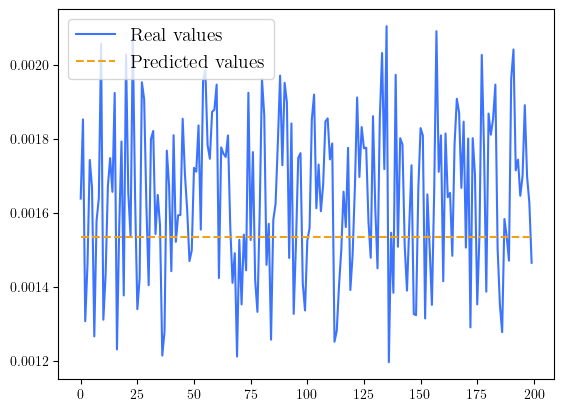

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


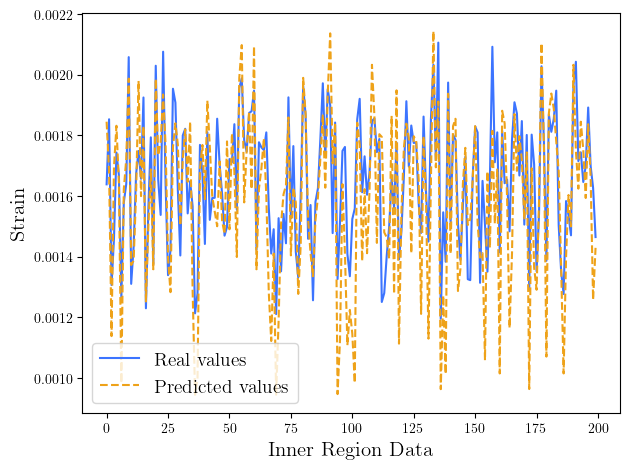

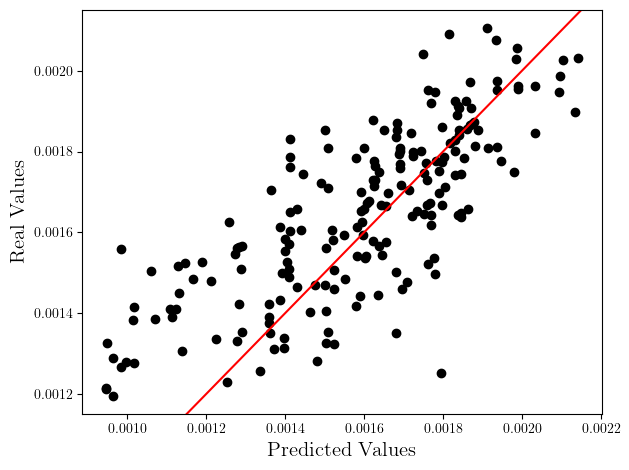

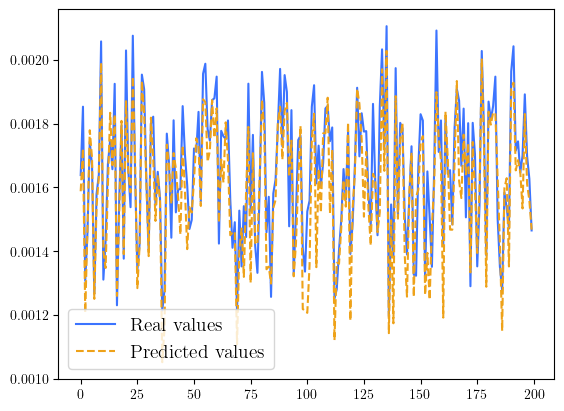

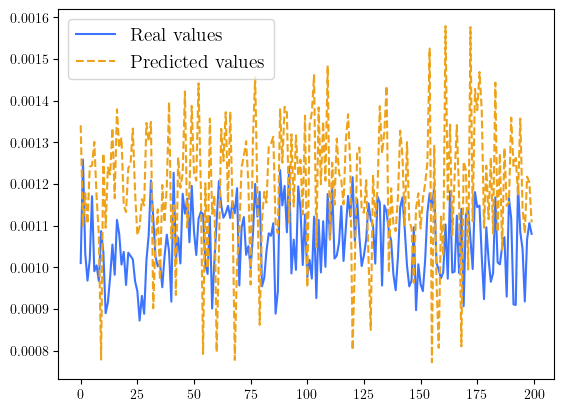

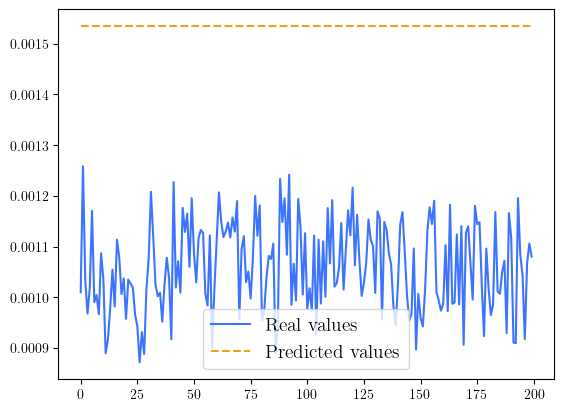

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


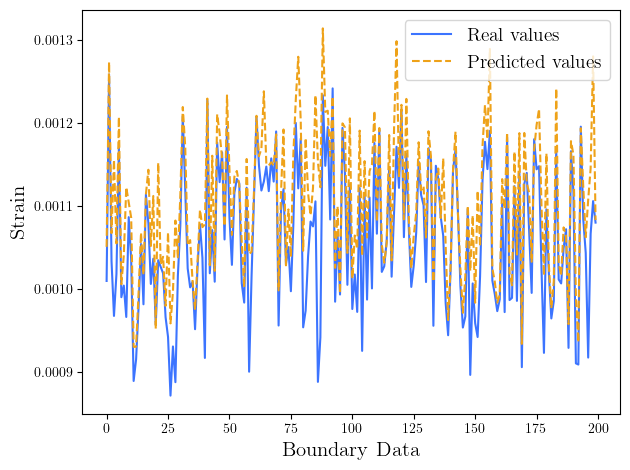

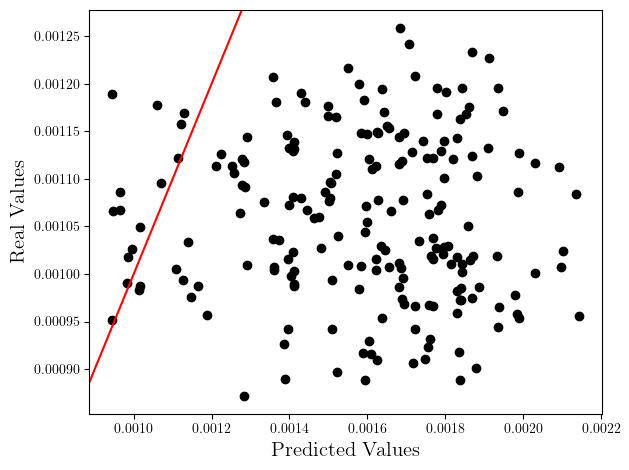

In [186]:
x=np.arange(0,len(y_test_kb),1)

fig1_kb = plt.figure()
plt.plot(x,y_test_kb, '-', color=pretty_blue, label='Real values')
plt.legend()
plt.tight_layout()
plt.savefig('./figures/withoutclass-regression.eps',format='eps',dpi=300)
plt.savefig('./figures/withoutclass-regression.svg')
plt.show()

fig_true_predict_kb, ax = plt.subplots()
plt.plot(y_predict_lr_kb, y_test_kb, 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.tight_layout()
plt.savefig('./figures/withoutclass-regression-true-predict.eps',format='eps',dpi=300)
plt.show()

fig2 = plt.figure()
plt.plot(x,y_test_kb, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_svr_kb, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig3 = plt.figure()
plt.plot(x,y_test_kb, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_dt_kb, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig4 = plt.figure()
plt.plot(x,y_test_kb, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_rf_kb, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

x2 = np.arange(0,len(y_test_kb[y_test_class==0]),1)

fig1k = plt.figure()
plt.plot(x2,y_test_kb[y_test_class==0], '-', color=pretty_blue, label='Real values')
plt.plot(x2,y_predict_lr_kernel, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig2k = plt.figure()
plt.plot(x2,y_test_kb[y_test_class==0], '-', color=pretty_blue, label='Real values')
plt.plot(x2,y_predict_svr_kernel, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig3k = plt.figure()
plt.plot(x2,y_test_kb[y_test_class==0], '-', color=pretty_blue, label='Real values')
plt.plot(x2,y_predict_dt_kernel, '--', color=nice_orange, label='Predicted values')
plt.xlabel('Inner Region Data', fontsize=15)
plt.ylabel('Strain', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/kernel-withoutclass-regression.eps',format='eps',dpi=300)
plt.savefig('./figures/kernel-withoutclass-regression.svg')
plt.show()

fig_true_predict_kb, ax = plt.subplots()
plt.plot(y_predict_dt_kernel, y_test_kb[y_test_class==0], 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.tight_layout()
plt.savefig('./figures/kernel-withoutclass-regression-true-predict.eps',format='eps',dpi=300)
plt.show()

fig4k = plt.figure()
plt.plot(x2,y_test_kb[y_test_class==0], '-', color=pretty_blue, label='Real values')
plt.plot(x2,y_predict_rf_kernel, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

x3 = np.arange(0,len(y_test_kb[y_test_class==1]),1)

fig1b = plt.figure()
plt.plot(x3,y_test_kb[y_test_class==1], '-', color=pretty_blue, label='Real values')
plt.plot(x3,y_predict_lr_bound, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig2b = plt.figure()
plt.plot(x3,y_test_kb[y_test_class==1], '-', color=pretty_blue, label='Real values')
plt.plot(x3,y_predict_svr_bound, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig4b = plt.figure()
plt.plot(x3,y_test_kb[y_test_class==1], '-', color=pretty_blue, label='Real values')
plt.plot(x3,y_predict_rf_bound, '--', color=nice_orange, label='Predicted values')
plt.xlabel('Boundary Data', fontsize=15)
plt.ylabel('Strain', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/bound-withoutclass-regression.eps',format='eps',dpi=300)
plt.savefig('./figures/bound-withoutclass-regression.svg')
plt.show()

fig_true_predict_kb, ax = plt.subplots()
plt.plot(y_predict_dt_kernel, y_test_kb[y_test_class==1], 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.tight_layout()
plt.savefig('./figures/bound-withoutclass-regression-true-predict.eps',format='eps',dpi=300)
plt.show()